In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
from astro import calc_abs_mag
from coord import *
from sptselection import *
import pandas as pd

## Load references for moving groups

In [2]:
mg_ref = Table.read('Catalogs/moving_groups_ref.csv',format='csv')

In [3]:
source_ref = Table.read('Catalogs/source_ref.csv',format='csv')

## Set infrastructure

In [4]:
ra_all,dec_all,spt_all = [],[],[]
ewha_all,ewha_err_all = [],[]
lhalbol_all,lhalbol_err_all = [],[]
age_all,age_err_all = [],[]
group_num_all,group_name_all = [],[]
source_num_all,source_ref_all = [],[]
rv_all,J_all,H_all,K_all = [],[],[],[]
V_all = []

## Alonso-Floriano 2015 (with Newton 2017)

## Ansdell 2015

In [5]:
ansdell2015 = fits.open('Catalogs/Sources/Ansdell2015.fit')

In [6]:
ra_ansdell2015 = ansdell2015[1].data['_RA']     
dec_ansdell2015 = ansdell2015[1].data['_DE']
N_ansdell2015 = len(dec_ansdell2015)
spt_ansdell2015 = np.ones(N_ansdell2015)*np.nan
ewha_ansdell2015 = ansdell2015[1].data['EWHa']
ewha_err_ansdell2015 = np.ones(N_ansdell2015)*np.nan
lhalbol_ansdell2015 = np.ones(N_ansdell2015)*np.nan
lhalbol_err_ansdell2015 = np.ones(N_ansdell2015)*np.nan
age_ansdell2015 = np.ones(N_ansdell2015)*np.nan
age_err_ansdell2015 = np.ones(N_ansdell2015)*np.nan
#rv_ansdell2015 = np.ones(N_ansdell2015)*np.nan

group_num_ansdell2015 = np.ones(N_ansdell2015)*np.nan
group_name_ansdell2015 = np.ones(N_ansdell2015)*np.nan
source_num_ansdell2015 = np.ones(N_ansdell2015)*source_ref['source_num'][source_ref['source_ref']=='Ansdell 2015'][0]
source_ref_ansdell2015 = np.array(['Ansdell 2015' for x in range(N_ansdell2015)])

In [7]:
ra_all.append(ra_ansdell2015) 
dec_all.append(dec_ansdell2015)
spt_all.append(spt_ansdell2015)
ewha_all.append(ewha_ansdell2015)
ewha_err_all.append(ewha_err_ansdell2015)
lhalbol_all.append(lhalbol_ansdell2015)
lhalbol_err_all.append(lhalbol_err_ansdell2015)
age_all.append(age_ansdell2015)
age_err_all.append(age_err_ansdell2015)
#rv_all.append(rv_ansdell2015)
group_num_all.append(group_num_ansdell2015)
group_name_all.append(group_name_ansdell2015)
source_num_all.append(source_num_ansdell2015)
source_ref_all.append(source_ref_ansdell2015)

In [8]:
ansdell2015.close()

## Bayo 2012

In [9]:
bayo2012 = Table.read('Catalogs/Sources/Bayo2012.fit')

In [10]:
ra_bayo2012 = np.array(np.array(bayo2012['_RA']))
dec_bayo2012 = np.array(np.array(bayo2012['_DE']))
N_bayo2012 = len(dec_bayo2012)
spt_bayo2012 = np.ones(N_bayo2012)*np.nan
ewha_bayo2012 = np.array(bayo2012['W_Ha_'])*(-1)
ewha_err_bayo2012 = np.array(bayo2012['e_W_Ha_'])
lhalbol_bayo2012 = np.ones(N_bayo2012)*np.nan
lhalbol_err_bayo2012 = np.ones(N_bayo2012)*np.nan
age_bayo2012 = np.ones(N_bayo2012)*np.nan
age_err_bayo2012 = np.ones(N_bayo2012)*np.nan
#rv_bayo2012 = np.ones(N_bayo2012)*np.nan

group_num_bayo2012 = np.ones(N_bayo2012)*np.nan
group_name_bayo2012 = np.ones(N_bayo2012)*np.nan
source_num_bayo2012 = np.ones(N_bayo2012)*source_ref['source_num'][source_ref['source_ref']=='Bayo 2012'][0]
source_ref_bayo2012 = np.array(['Bayo 2012' for x in range(N_bayo2012)])

In [11]:
ra_all.append(ra_bayo2012) 
dec_all.append(dec_bayo2012)
spt_all.append(spt_bayo2012)
ewha_all.append(ewha_bayo2012)
ewha_err_all.append(ewha_err_bayo2012)
lhalbol_all.append(lhalbol_bayo2012)
lhalbol_err_all.append(lhalbol_err_bayo2012)
age_all.append(age_bayo2012)
age_err_all.append(age_err_bayo2012)
#rv_all.append(rv_bayo2012)
group_num_all.append(group_num_bayo2012)
group_name_all.append(group_name_bayo2012)
source_num_all.append(source_num_bayo2012)
source_ref_all.append(source_ref_bayo2012)

## Bochanski 2005 (with Newton 2017)

## Bouy 2009: Upper Sco

In [12]:
bouy2009 = fits.open('Catalogs/Sources/Bouy2009.fit')

In [13]:
ra_bouy2009,dec_bouy2009 = hstodeg(bouy2009[1].data['RAJ2000'],bouy2009[1].data['DEJ2000'])
N_bouy2009 = len(dec_bouy2009)
spt_bouy2009 = organize_spt(bouy2009[1].data['SpT'])
ewha_bouy2009 = bouy2009[1].data['EWHa']*(-1)
ewha_err_bouy2009 = np.ones(N_bouy2009)*0.1 #says in the paper
lhalbol_bouy2009 = np.ones(N_bouy2009)*np.nan
lhalbol_err_bouy2009 = np.ones(N_bouy2009)*np.nan
kmag_bouy2009 = np.ones(N_bouy2009)*np.nan
kmag_err_bouy2009 = np.ones(N_bouy2009)*np.nan
age_bouy2009 = np.ones(N_bouy2009)*mg_ref['age'][mg_ref['name']=='USCO'][0]
age_err_bouy2009 = np.ones(N_bouy2009)*mg_ref['age_error'][mg_ref['name']=='USCO'][0]

group_num_bouy2009 = np.ones(N_bouy2009)*mg_ref['group_num'][mg_ref['name']=='USCO'][0]
group_name_bouy2009 = np.array(['USCO' for i in range(N_bouy2009)])
source_num_bouy2009 = np.ones(N_bouy2009)*source_ref['source_num'][source_ref['source_ref']=='Bouy 2009'][0]
source_ref_bouy2009 = np.array(['Bouy 2009' for x in range(N_bouy2009)])

In [14]:
bouy2009.close()

In [15]:
ra_all.append(ra_bouy2009) 
dec_all.append(dec_bouy2009)
spt_all.append(spt_bouy2009)
ewha_all.append(ewha_bouy2009)
ewha_err_all.append(ewha_err_bouy2009)
lhalbol_all.append(lhalbol_bouy2009)
lhalbol_err_all.append(lhalbol_err_bouy2009)
age_all.append(age_bouy2009)
age_err_all.append(age_err_bouy2009)
group_num_all.append(group_num_bouy2009)
group_name_all.append(group_name_bouy2009)
source_num_all.append(source_num_bouy2009)
source_ref_all.append(source_ref_bouy2009)

## Cruz 2002 (with Newton 2017)

## Douglas 2014: Praesepe

In [16]:
douglas2014_p = fits.open('Catalogs/Sources/Douglas2014_praesepe.fit')

In [17]:
N_douglas2014_p = len(douglas2014_p[1].data['_RAJ2000'])
ra_douglas2014_p = douglas2014_p[1].data['_RAJ2000']
dec_douglas2014_p = douglas2014_p[1].data['_DEJ2000']
spt_douglas2014_p = organize_spt(douglas2014_p[1].data['SpType'])
ewha_douglas2014_p = douglas2014_p[1].data['EW']*-1
ewha_err_douglas2014_p = douglas2014_p[1].data['e_EW']
lhalbol_douglas2014_p = douglas2014_p[1].data['Lum']*1e-5
lhalbol_err_douglas2014_p = douglas2014_p[1].data['e_Lum']*1e-5
kmag_douglas2014_p = douglas2014_p[1].data['Kmag']
kmag_err_douglas2014_p = douglas2014_p[1].data['e_Kmag']
age_douglas2014_p = np.ones(N_douglas2014_p)*mg_ref['age'][mg_ref['name']=='PRA'][0]
age_err_douglas2014_p = np.ones(N_douglas2014_p)*mg_ref['age_error'][mg_ref['name']=='PRA'][0]
group_num_douglas2014_p = np.ones(N_douglas2014_p)*mg_ref['group_num'][mg_ref['name']=='PRA'][0]
group_name_douglas2014_p = np.array(['PRA' for x in range(N_douglas2014_p)])
source_num_douglas2014_p = np.ones(N_douglas2014_p)*source_ref['source_num'][source_ref['source_ref']=='Douglas 2014'][0]
source_ref_douglas2014_p = np.array(['Douglas 2014' for x in range(N_douglas2014_p)])

In [18]:
for column in [ewha_douglas2014_p,ewha_err_douglas2014_p,lhalbol_douglas2014_p,lhalbol_err_douglas2014_p]:
    mask = column == 0.0
    column[mask] = np.nan
    mask = column == -0.0
    column[mask] = np.nan

In [19]:
douglas2014_p.close()

In [20]:
ra_all.append(ra_douglas2014_p) 
dec_all.append(dec_douglas2014_p)
spt_all.append(spt_douglas2014_p)
ewha_all.append(ewha_douglas2014_p)
ewha_err_all.append(ewha_err_douglas2014_p)
lhalbol_all.append(lhalbol_douglas2014_p)
lhalbol_err_all.append(lhalbol_err_douglas2014_p)
age_all.append(age_douglas2014_p)
age_err_all.append(age_err_douglas2014_p)
group_num_all.append(group_num_douglas2014_p)
group_name_all.append(group_name_douglas2014_p)
source_num_all.append(source_num_douglas2014_p)
source_ref_all.append(source_ref_douglas2014_p)

## Douglas 2014: Hyades

In [21]:
douglas2014_h = fits.open('Catalogs/Sources/Douglas2014_hyades.fit')

In [22]:
N_douglas2014_h = len(douglas2014_h[1].data['_RAJ2000'])
ra_douglas2014_h = douglas2014_h[1].data['_RAJ2000']
dec_douglas2014_h = douglas2014_h[1].data['_DEJ2000']
spt_douglas2014_h = organize_spt(douglas2014_h[1].data['SpTypeH'])
ewha_douglas2014_h = douglas2014_h[1].data['EW']*-1
ewha_err_douglas2014_h = douglas2014_h[1].data['e_EW']
lhalbol_douglas2014_h = douglas2014_h[1].data['Lum']*1e-5
lhalbol_err_douglas2014_h = douglas2014_h[1].data['e_Lum']*1e-5
kmag_douglas2014_h = douglas2014_h[1].data['Kmag']
kmag_err_douglas2014_h = douglas2014_h[1].data['e_Kmag']
age_douglas2014_h = np.ones(N_douglas2014_h)*mg_ref['age'][mg_ref['name']=='HYA'][0]
age_err_douglas2014_h = np.ones(N_douglas2014_h)*mg_ref['age_error'][mg_ref['name']=='HYA'][0]
group_num_douglas2014_h = np.ones(N_douglas2014_h)*mg_ref['group_num'][mg_ref['name']=='HYA'][0]
group_name_douglas2014_h = np.array(['HYA' for x in range(N_douglas2014_h)])
source_num_douglas2014_h = np.ones(N_douglas2014_h)*source_ref['source_num'][source_ref['source_ref']=='Douglas 2014'][0]
source_ref_douglas2014_h = np.array(['Douglas 2014' for x in range(N_douglas2014_h)])

In [23]:
for column in [ewha_douglas2014_h,ewha_err_douglas2014_h,lhalbol_douglas2014_h,lhalbol_err_douglas2014_h]:
    mask = column == 0.0
    column[mask] = np.nan
    mask = column == -0.0
    column[mask] = np.nan

In [24]:
douglas2014_h.close()

In [25]:
ra_all.append(ra_douglas2014_h) 
dec_all.append(dec_douglas2014_h)
spt_all.append(spt_douglas2014_h)
ewha_all.append(ewha_douglas2014_h)
ewha_err_all.append(ewha_err_douglas2014_h)
lhalbol_all.append(lhalbol_douglas2014_h)
lhalbol_err_all.append(lhalbol_err_douglas2014_h)
age_all.append(age_douglas2014_h)
age_err_all.append(age_err_douglas2014_h)
group_num_all.append(group_num_douglas2014_h)
group_name_all.append(group_name_douglas2014_h)
source_num_all.append(source_num_douglas2014_h)
source_ref_all.append(source_ref_douglas2014_h)

## Elliott 2016

In [26]:
elliott2016 = fits.open('Catalogs/Sources/elliott2016.fit')

In [27]:
ra_elliott2016 = elliott2016[1].data['RAJ2000']
dec_elliott2016 = elliott2016[1].data['DEJ2000']
N_elliott2016 = len(dec_elliott2016)
spt_elliott2016 = np.ones(N_elliott2016)*np.nan
ewha_elliott2016 = elliott2016[1].data['EWHa']
ewha_err_elliott2016 = elliott2016[1].data['e_EWHa']
lhalbol_elliott2016 = np.ones(N_elliott2016)*np.nan
lhalbol_err_elliott2016 = np.ones(N_elliott2016)*np.nan

age_elliott2016 = np.ones(N_elliott2016)*np.nan
age_err_elliott2016 = np.ones(N_elliott2016)*np.nan
group_num_elliott2016 = np.ones(N_elliott2016)*np.nan

group_name_elliott2016 = []
names = np.array(['BPMG','ABDMG','THA','COL','ARG','OCT','TWA','EPSC','CAR'])
names2 = np.array(['BPC','ABD','THA','COL','ARG','OCT','TWA','ECH','CAR'])
for x in elliott2016[1].data['Assoc']:
    mask = x == names2
    group_name_elliott2016.append(names[mask][0])

group_name_elliott2016 = np.array(group_name_elliott2016)
for x in ['BPMG','ABDMG','THA','COL','ARG','OCT','TWA','EPSC','CAR']:
    mask1 = group_name_elliott2016 == x
    n_mask = len(elliott2016[1].data['Assoc'][mask1])
    age_elliott2016[mask1] = np.ones(n_mask)*mg_ref['age'][mg_ref['name']==x][0]
    age_err_elliott2016[mask1] = np.ones(n_mask)*mg_ref['age_error'][mg_ref['name']==x][0]
    group_num_elliott2016[mask1] = np.ones(n_mask)*mg_ref['group_num'][mg_ref['name']==x][0]

source_num_elliott2016 = np.ones(N_elliott2016)*source_ref['source_num'][source_ref['source_ref']=='Elliott 2016'][0]
source_ref_elliott2016 = np.array(['Elliott 2016' for x in range(N_elliott2016)])

In [28]:
ra_all.append(ra_elliott2016) 
dec_all.append(dec_elliott2016)
spt_all.append(spt_elliott2016)
ewha_all.append(ewha_elliott2016)
ewha_err_all.append(ewha_err_elliott2016)
lhalbol_all.append(lhalbol_elliott2016)
lhalbol_err_all.append(lhalbol_err_elliott2016)
age_all.append(age_elliott2016)
age_err_all.append(age_err_elliott2016)
group_num_all.append(group_num_elliott2016)
group_name_all.append(group_name_elliott2016)
source_num_all.append(source_num_elliott2016)
source_ref_all.append(source_ref_elliott2016)

## Fang 2018: Pleiades, M34, Praesepe and Hyades

In [29]:
file1 = pd.read_csv('Catalogs/Sources/Fang2018Table_F1_online.dat', sep="\s+")
file2 = pd.read_csv('Catalogs/Sources/Fang2018Table_F2_online.dat', sep="\s+")
file3 = pd.read_csv('Catalogs/Sources/Fang2018Table_F3_online.dat', sep="\s+")
file4 = pd.read_csv('Catalogs/Sources/Fang2018Table_F4_online.dat', sep="\s+")

In [30]:
N = len(file1['EWHa']) + len(file2['EWHa']) + len(file3['EWHa']) + len(file4['EWHa'])

In [31]:
teff1 = file1['#Teff']
ewha1 = file1['EWHa']
multi1 = file1['multi'] == 0
N1 = len(file1['EWHa'])
group1 = np.array(['PLE' for x in range(N1)])
group_num1 = np.ones(N1)*mg_ref['group_num'][mg_ref['name']=='PLE'][0]
age1 = np.ones(N1)*mg_ref['age'][mg_ref['name']=='PLE'][0]
age_err1 = np.ones(N1)*mg_ref['age_error'][mg_ref['name']=='PLE'][0]
ra1 = file1['RAJ2000']
dec1 = file1['DEJ2000']

teff2 = file2['Teff']
ewha2 = file2['EWHa']
N2 = len(file2['EWHa'])
multi2 = np.array([True for x in range(N2)])
group2 = np.array(['M34' for x in range(N2)])
group_num2 = np.ones(N2)*mg_ref['group_num'][mg_ref['name']=='M34'][0]
age2 = np.ones(N2)*mg_ref['age'][mg_ref['name']=='M34'][0]
age_err2 = np.ones(N2)*mg_ref['age_error'][mg_ref['name']=='M34'][0]
ra2 = file2['RAJ2000']
dec2 = file2['DEJ2000']

teff3 = file3['Teff']
ewha3 = file3['EWHa']
N3 = len(file3['EWHa'])
multi3 = np.array([True for x in range(N3)])
group3 = np.array(['PRA' for x in range(N3)])
group_num3 = np.ones(N3)*mg_ref['group_num'][mg_ref['name']=='PRA'][0]
age3 = np.ones(N3)*mg_ref['age'][mg_ref['name']=='PRA'][0]
age_err3 = np.ones(N3)*mg_ref['age_error'][mg_ref['name']=='PRA'][0]
ra3 = file3['RAJ2000']
dec3 = file3['DEJ2000']

teff4 = file4['Teff']
ewha4 = file4['EWHa']
multi4 = file4['multi'] == 0
N4 = len(file4['EWHa'])
group4 = np.array(['HYA' for x in range(N4)])
group_num4 = np.ones(N4)*mg_ref['group_num'][mg_ref['name']=='HYA'][0]
age4 = np.ones(N4)*mg_ref['age'][mg_ref['name']=='HYA'][0]
age_err4 = np.ones(N4)*mg_ref['age_error'][mg_ref['name']=='HYA'][0]
ra4 = file4['RAJ2000']
dec4 = file4['DEJ2000']

In [32]:
ra_fang2018 = np.concatenate((ra1[multi1],ra2[multi2],ra3[multi3],ra4[multi4]))
dec_fang2018 = np.concatenate((dec1[multi1],dec2[multi2],dec3[multi3],dec4[multi4]))
N_fang2018 = len(dec_fang2018)
spt_fang2018 = np.nan*np.ones(N_fang2018)
ewha_fang2018 = np.concatenate((ewha1[multi1],ewha2[multi2],ewha3[multi3],ewha4[multi4]))
ewha_err_fang2018 = 0.5*np.ones(N_fang2018)
lhalbol_fang2018 = np.nan*np.ones(N_fang2018)
lhalbol_err_fang2018 = np.nan*np.ones(N_fang2018)
kmag_fang2018 = np.nan*np.ones(N_fang2018)
kmag_err_fang2018 = np.nan*np.ones(N_fang2018)
age_fang2018 = np.concatenate((age1[multi1],age2[multi2],age3[multi3],age4[multi4]))
age_err_fang2018 = np.concatenate((age_err1[multi1],age_err2[multi2],age_err3[multi3],age_err4[multi4]))
group_num_fang2018 = np.concatenate((group_num1[multi1],group_num2[multi2],group_num3[multi3],group_num4[multi4]))
group_name_fang2018 = np.concatenate((group1[multi1],group2[multi2],group3[multi3],group4[multi4]))
source_num_fang2018 = np.ones(N_fang2018)*source_ref['source_num'][source_ref['source_ref']=='Fang 2018'][0]
source_ref_fang2018 = np.array(['Fang 2018' for x in range(N_fang2018)])

In [33]:
for column in [ewha_fang2018]:
    mask = column == -9999.0
    column[mask] = np.nan

In [34]:
ra_all.append(ra_fang2018) 
dec_all.append(dec_fang2018)
spt_all.append(spt_fang2018)
ewha_all.append(ewha_fang2018)
ewha_err_all.append(ewha_err_fang2018)
lhalbol_all.append(lhalbol_fang2018)
lhalbol_err_all.append(lhalbol_err_fang2018)
age_all.append(age_fang2018)
age_err_all.append(age_err_fang2018)
group_num_all.append(group_num_fang2018)
group_name_all.append(group_name_fang2018)
source_num_all.append(source_num_fang2018)
source_ref_all.append(source_ref_fang2018)

## Feigelson 2003

In [35]:
feigelson2003 = Table.read('Catalogs/Sources/Feigelson2003.csv', format='csv')

In [36]:
feigelson2003 = feigelson2003[:9]

In [37]:
ra_feigelson2003,dec_feigelson2003 = [],[]
for x,y in zip(np.array(feigelson2003['Ra']),np.array(feigelson2003['De'])):
    radec = str(x)+' '+str(y)
    coord = SkyCoord(radec, unit=(u.hourangle, u.deg))
    ra_feigelson2003.append(coord.ra.deg)
    dec_feigelson2003.append(coord.dec.deg)
ra_feigelson2003 = np.array(ra_feigelson2003)
dec_feigelson2003 = np.array(dec_feigelson2003)
N_feigelson2003 = len(dec_feigelson2003)
spt_feigelson2003 = np.array(feigelson2003['SpT'])
ewha_feigelson2003 = np.array(feigelson2003['HAEW'])*(-1)
ewha_err_feigelson2003 = np.ones(N_feigelson2003)*np.nan
lhalbol_feigelson2003 = np.ones(N_feigelson2003)*np.nan
lhalbol_err_feigelson2003 = np.ones(N_feigelson2003)*np.nan

age_feigelson2003 = np.ones(N_feigelson2003)*np.nan
age_err_feigelson2003 = np.ones(N_feigelson2003)*np.nan
group_num_feigelson2003 = np.ones(N_feigelson2003)*np.nan

for x in ['BPMG','EPSC','THA','TWA']:
    mask1 = feigelson2003['Group'] == x
    age_feigelson2003[mask1] = np.ones(len(feigelson2003['Group'][mask1]))*mg_ref['age'][mg_ref['name']==x][0]
    age_err_feigelson2003[mask1] = np.ones(len(feigelson2003['Group'][mask1]))*mg_ref['age_error'][mg_ref['name']==x][0]
    group_num_feigelson2003[mask1] = np.ones(len(feigelson2003['Group'][mask1]))*mg_ref['group_num'][mg_ref['name']==x][0]
    
group_name_feigelson2003 = np.array(feigelson2003['Group'])
source_num_feigelson2003 = np.ones(N_feigelson2003)*source_ref['source_num'][source_ref['source_ref']=='Feigelson 2003'][0]
source_ref_feigelson2003 = np.array(['Feigelson 2003' for x in range(N_feigelson2003)])

In [38]:
ra_all.append(ra_feigelson2003) 
dec_all.append(dec_feigelson2003)
spt_all.append(spt_feigelson2003)
ewha_all.append(ewha_feigelson2003)
ewha_err_all.append(ewha_err_feigelson2003)
lhalbol_all.append(lhalbol_feigelson2003)
lhalbol_err_all.append(lhalbol_err_feigelson2003)
age_all.append(age_feigelson2003)
age_err_all.append(age_err_feigelson2003)
group_num_all.append(group_num_feigelson2003)
group_name_all.append(group_name_feigelson2003)
source_num_all.append(source_num_feigelson2003)
source_ref_all.append(source_ref_feigelson2003)

## Frasca 2018

In [39]:
frasca2018 = Table.read('Catalogs/Sources/Frasca2018.fit')

In [40]:
ra_frasca2018 = np.array(np.array(frasca2018['RAJ2000']))
dec_frasca2018 = np.array(np.array(frasca2018['DEJ2000']))
N_frasca2018 = len(dec_frasca2018)
spt_frasca2018 = np.ones(N_frasca2018)*np.nan
ewha_frasca2018 = np.array(frasca2018['EWHa'])*(-0.001)
ewha_err_frasca2018 = np.array(frasca2018['e_EWHa'])*(0.001)
lhalbol_frasca2018 = np.ones(N_frasca2018)*np.nan
lhalbol_err_frasca2018 = np.ones(N_frasca2018)*np.nan
age_frasca2018 = np.ones(N_frasca2018)*np.nan
age_err_frasca2018 = np.ones(N_frasca2018)*np.nan

group_num_frasca2018 = np.ones(N_frasca2018)*np.nan
group_name_frasca2018 = np.ones(N_frasca2018)*np.nan
source_num_frasca2018 = np.ones(N_frasca2018)*source_ref['source_num'][source_ref['source_ref']=='Frasca 2018'][0]
source_ref_frasca2018 = np.array(['Frasca 2018' for x in range(N_frasca2018)])

In [41]:
ra_all.append(ra_frasca2018) 
dec_all.append(dec_frasca2018)
spt_all.append(spt_frasca2018)
ewha_all.append(ewha_frasca2018)
ewha_err_all.append(ewha_err_frasca2018)
lhalbol_all.append(lhalbol_frasca2018)
lhalbol_err_all.append(lhalbol_err_frasca2018)
age_all.append(age_frasca2018)
age_err_all.append(age_err_frasca2018)
group_num_all.append(group_num_frasca2018)
group_name_all.append(group_name_frasca2018)
source_num_all.append(source_num_frasca2018)
source_ref_all.append(source_ref_frasca2018)

## Gaidos 2014 (with Newton 2017)

## Gizis 1997 (with Newton 2017)

## Gizis 2000 (with Newton 2017)

## Gizis 2002 (with Newton 2017)

## Hawley 1996 (with Newton 2017)

## Ivanov 2015 (with Newton 2017)

## Jayawardhana 2006

In [42]:
jayawardhana2006 = Table.read('Catalogs/Sources/jayawardhana2006.csv', format='csv')

In [43]:
ra_jayawardhana2006 = np.array(jayawardhana2006['Ra'])     
dec_jayawardhana2006 = np.array(jayawardhana2006['De'])
N_jayawardhana2006 = len(dec_jayawardhana2006)
spt_jayawardhana2006 = np.array(jayawardhana2006['SpT'])
ewha_jayawardhana2006 = np.array(jayawardhana2006['EWHA'])*(-1)
ewha_err_jayawardhana2006 = np.array(jayawardhana2006['EWHA_err'])
lhalbol_jayawardhana2006 = np.ones(N_jayawardhana2006)*np.nan
lhalbol_err_jayawardhana2006 = np.ones(N_jayawardhana2006)*np.nan

age_jayawardhana2006 = np.ones(N_jayawardhana2006)*np.nan
age_err_jayawardhana2006 = np.ones(N_jayawardhana2006)*np.nan
group_num_jayawardhana2006 = np.ones(N_jayawardhana2006)*np.nan

for x in ['BPMG','ETAC','THA','TWA']:
    mask1 = jayawardhana2006['Group'] == x
    age_jayawardhana2006[mask1] = np.ones(len(jayawardhana2006['Group'][mask1]))*mg_ref['age'][mg_ref['name']==x][0]
    age_err_jayawardhana2006[mask1] = np.ones(len(jayawardhana2006['Group'][mask1]))*mg_ref['age_error'][mg_ref['name']==x][0]
    group_num_jayawardhana2006[mask1] = np.ones(len(jayawardhana2006['Group'][mask1]))*mg_ref['group_num'][mg_ref['name']==x][0]
    
group_name_jayawardhana2006 = np.array(jayawardhana2006['Group'])
source_num_jayawardhana2006 = np.ones(N_jayawardhana2006)*source_ref['source_num'][source_ref['source_ref']=='Jayawardhana 2006'][0]
source_ref_jayawardhana2006 = np.array(['Jayawardhana 2006' for x in range(N_jayawardhana2006)])

In [44]:
ra_all.append(ra_jayawardhana2006) 
dec_all.append(dec_jayawardhana2006)
spt_all.append(spt_jayawardhana2006)
ewha_all.append(ewha_jayawardhana2006)
ewha_err_all.append(ewha_err_jayawardhana2006)
lhalbol_all.append(lhalbol_jayawardhana2006)
lhalbol_err_all.append(lhalbol_err_jayawardhana2006)
age_all.append(age_jayawardhana2006)
age_err_all.append(age_err_jayawardhana2006)
group_num_all.append(group_num_jayawardhana2006)
group_name_all.append(group_name_jayawardhana2006)
source_num_all.append(source_num_jayawardhana2006)
source_ref_all.append(source_ref_jayawardhana2006)

## Jeffers 2018

In [45]:
jeffers2018 = fits.open('Catalogs/Sources/Jeffers2018.fit')

In [46]:
ra_jeffers2018 = jeffers2018[1].data['_RA']     
dec_jeffers2018 = jeffers2018[1].data['_DE']
N_jeffers2018 = len(dec_jeffers2018)
spt_jeffers2018 = jeffers2018[1].data['SpType']
ewha_jeffers2018 = jeffers2018[1].data['pEWHa']*(-1)
ewha_err_jeffers2018 = jeffers2018[1].data['e_pEWHa']
lhalbol_jeffers2018 = np.ones(N_jeffers2018)*np.nan
lhalbol_err_jeffers2018 = np.ones(N_jeffers2018)*np.nan
age_jeffers2018 = np.ones(N_jeffers2018)*np.nan
age_err_jeffers2018 = np.ones(N_jeffers2018)*np.nan

group_num_jeffers2018 = np.ones(N_jeffers2018)*np.nan
group_name_jeffers2018 = np.ones(N_jeffers2018)*np.nan
source_num_jeffers2018 = np.ones(N_jeffers2018)*source_ref['source_num'][source_ref['source_ref']=='Jeffers 2018'][0]
source_ref_jeffers2018 = np.array(['Jeffers 2018' for x in range(N_jeffers2018)])

In [47]:
ra_all.append(ra_jeffers2018) 
dec_all.append(dec_jeffers2018)
spt_all.append(spt_jeffers2018)
ewha_all.append(ewha_jeffers2018)
ewha_err_all.append(ewha_err_jeffers2018)
lhalbol_all.append(lhalbol_jeffers2018)
lhalbol_err_all.append(lhalbol_err_jeffers2018)
age_all.append(age_jeffers2018)
age_err_all.append(age_err_jeffers2018)
group_num_all.append(group_num_jeffers2018)
group_name_all.append(group_name_jeffers2018)
source_num_all.append(source_num_jeffers2018)
source_ref_all.append(source_ref_jeffers2018)

In [48]:
jeffers2018.close()

## Kiman 2019: MLSDSS-GaiaDR2

In [49]:
#target_url = 'https://zenodo.org/record/2636692/files/MLSDSS-GaiaDR2_extended.fits?download=1'
#kiman2019 = Table.read(target_url)
kiman2019 = Table.read('/Users/rociokiman/Documents/Gaia-Cupid/Catalogs/MLSDSS-GaiaDR2.fits')

In [50]:
wdm_mask = kiman2019['WDM'] == 0 #Remove m dwarfs identified asmixed with a white dwarf.

ra_kiman2019 = np.array(kiman2019['RA_SDSS'][wdm_mask])     
dec_kiman2019 = np.array(kiman2019['DEC_SDSS'][wdm_mask])
N_kiman2019 = len(dec_kiman2019)
spt_kiman2019 = np.array(kiman2019['SPT'][wdm_mask])
ewha_kiman2019 = np.array(kiman2019['EWHA'][wdm_mask])
ewha_err_kiman2019 = np.array(kiman2019['EWHA_ERR'][wdm_mask])
lhalbol_kiman2019 = np.array(kiman2019['LHALBOL'][wdm_mask])
lhalbol_err_kiman2019 = np.array(kiman2019['LHALBOL_ERR'][wdm_mask])
age_kiman2019 = np.ones(N_kiman2019)*np.nan
age_err_kiman2019 = np.ones(N_kiman2019)*np.nan

group_num_kiman2019 = np.ones(N_kiman2019)*np.nan
group_name_kiman2019 = np.ones(N_kiman2019)*np.nan
source_num_kiman2019 = np.ones(N_kiman2019)*source_ref['source_num'][source_ref['source_ref']=='Kiman 2019'][0]
source_ref_kiman2019 = np.array(['Kiman 2019' for x in range(N_kiman2019)])

In [51]:
ra_all.append(ra_kiman2019) 
dec_all.append(dec_kiman2019)
spt_all.append(spt_kiman2019)
ewha_all.append(ewha_kiman2019)
ewha_err_all.append(ewha_err_kiman2019)
lhalbol_all.append(lhalbol_kiman2019)
lhalbol_err_all.append(lhalbol_err_kiman2019)
age_all.append(age_kiman2019)
age_err_all.append(age_err_kiman2019)
group_num_all.append(group_num_kiman2019)
group_name_all.append(group_name_kiman2019)
source_num_all.append(source_num_kiman2019)
source_ref_all.append(source_ref_kiman2019)

## Kraus 2014: Tucana-Horologium

In [52]:
kraus2014 = fits.open('Catalogs/Sources/Kraus2014.fit')

In [53]:
ra_kraus2014 = kraus2014[1].data['_RAJ2000']
dec_kraus2014 = kraus2014[1].data['_DEJ2000']
N_kraus2014 = len(dec_kraus2014)
spt_kraus2014 = organize_spt(kraus2014[1].data['SpT'])
ewha_kraus2014 = kraus2014[1].data['EWHa']*(-1)
ewha_err_kraus2014 = np.ones(N_kraus2014)*0.1 #says in the paper
lhalbol_kraus2014 = np.ones(N_kraus2014)*np.nan
lhalbol_err_kraus2014 = np.ones(N_kraus2014)*np.nan
kmag_kraus2014 = np.ones(N_kraus2014)*np.nan
kmag_err_kraus2014 = np.ones(N_kraus2014)*np.nan
age_kraus2014 = np.ones(N_kraus2014)*mg_ref['age'][mg_ref['name']=='THA'][0]
age_err_kraus2014 = np.ones(N_kraus2014)*mg_ref['age_error'][mg_ref['name']=='THA'][0]

group_num_kraus2014 = np.ones(N_kraus2014)*mg_ref['group_num'][mg_ref['name']=='THA'][0]
group_name_kraus2014 = np.array(['THA' for i in range(N_kraus2014)])
source_num_kraus2014 = np.ones(N_kraus2014)*source_ref['source_num'][source_ref['source_ref']=='Kraus 2014'][0]
source_ref_kraus2014 = np.array(['Kraus 2014' for x in range(N_kraus2014)])

In [54]:
kraus2014.close()

In [55]:
ra_all.append(ra_kraus2014) 
dec_all.append(dec_kraus2014)
spt_all.append(spt_kraus2014)
ewha_all.append(ewha_kraus2014)
ewha_err_all.append(ewha_err_kraus2014)
lhalbol_all.append(lhalbol_kraus2014)
lhalbol_err_all.append(lhalbol_err_kraus2014)
age_all.append(age_kraus2014)
age_err_all.append(age_err_kraus2014)
group_num_all.append(group_num_kraus2014)
group_name_all.append(group_name_kraus2014)
source_num_all.append(source_num_kraus2014)
source_ref_all.append(source_ref_kraus2014)

## Lawson 2004

In [56]:
ra_lawson2004 = np.array([129.1695833,129.4641667,130.3775000,130.8266667,132.1454167,132.8466667])     
dec_lawson2004 = np.array([-78.9161111,-78.7436111,-78.8852778,-79.0891667,-78.8977778,-79.0897222])
N_lawson2004 = len(dec_lawson2004)
spt_lawson2004 = np.array([2,-5,4,2,5,-6])
ewha_lawson2004 = np.array([0.9,1.1,-12,-110,-3.5,1.0])*(-1)
ewha_err_lawson2004 = np.ones(N_lawson2004)*np.nan
lhalbol_lawson2004 = np.ones(N_lawson2004)*np.nan
lhalbol_err_lawson2004 = np.ones(N_lawson2004)*np.nan
age_lawson2004 = np.ones(N_lawson2004)*mg_ref['age'][mg_ref['name']=='ETAC'][0]
age_err_lawson2004 = np.ones(N_lawson2004)*mg_ref['age_error'][mg_ref['name']=='ETAC'][0]

group_num_lawson2004 = np.ones(N_lawson2004)*mg_ref['group_num'][mg_ref['name']=='ETAC'][0]
group_name_lawson2004 = np.array(['ETAC' for i in range(N_lawson2004)])
source_num_lawson2004 = np.ones(N_lawson2004)*source_ref['source_num'][source_ref['source_ref']=='Lawson 2004'][0]
source_ref_lawson2004 = np.array(['Lawson 2004' for x in range(N_lawson2004)])

In [57]:
ra_all.append(ra_lawson2004) 
dec_all.append(dec_lawson2004)
spt_all.append(spt_lawson2004)
ewha_all.append(ewha_lawson2004)
ewha_err_all.append(ewha_err_lawson2004)
lhalbol_all.append(lhalbol_lawson2004)
lhalbol_err_all.append(lhalbol_err_lawson2004)
age_all.append(age_lawson2004)
age_err_all.append(age_err_lawson2004)
group_num_all.append(group_num_lawson2004)
group_name_all.append(group_name_lawson2004)
source_num_all.append(source_num_lawson2004)
source_ref_all.append(source_ref_lawson2004)

## Lepine 2003 (with Newton 2017)

## Lepine 2009 (with Newton 2017)

## Lepine 2013

In [58]:
lepine2013 = Table.read('Catalogs/Sources/Lepine2013.fit')

In [59]:
ra_lepine2013 = np.array(np.array(lepine2013['_RAJ2000']))
dec_lepine2013 = np.array(np.array(lepine2013['_DEJ2000']))
N_lepine2013 = len(dec_lepine2013)
spt_lepine2013 = organize_spt(np.array([str(x) for x in lepine2013['SpT']]))
ewha_lepine2013 = np.array(lepine2013['EWHa'])*(-1)
ewha_err_lepine2013 = np.ones(N_lepine2013)*np.nan
lhalbol_lepine2013 = np.ones(N_lepine2013)*np.nan
lhalbol_err_lepine2013 = np.ones(N_lepine2013)*np.nan
age_lepine2013 = np.ones(N_lepine2013)*np.nan
age_err_lepine2013 = np.ones(N_lepine2013)*np.nan

group_num_lepine2013 = np.ones(N_lepine2013)*np.nan
group_name_lepine2013 = np.ones(N_lepine2013)*np.nan
source_num_lepine2013 = np.ones(N_lepine2013)*source_ref['source_num'][source_ref['source_ref']=='Lepine 2013'][0]
source_ref_lepine2013 = np.array(['Lepine 2013' for x in range(N_lepine2013)])

In [60]:
ra_all.append(ra_lepine2013) 
dec_all.append(dec_lepine2013)
spt_all.append(spt_lepine2013)
ewha_all.append(ewha_lepine2013)
ewha_err_all.append(ewha_err_lepine2013)
lhalbol_all.append(lhalbol_lepine2013)
lhalbol_err_all.append(lhalbol_err_lepine2013)
age_all.append(age_lepine2013)
age_err_all.append(age_err_lepine2013)
group_num_all.append(group_num_lepine2013)
group_name_all.append(group_name_lepine2013)
source_num_all.append(source_num_lepine2013)
source_ref_all.append(source_ref_lepine2013)

## LG11_obs (Andrew Mann)

In [61]:
lg11 = Table.read('Catalogs/Sources/LG11_obs.csv') 

In [62]:
ra_lg11 = np.array(np.array(lg11['RA']))
dec_lg11 = np.array(np.array(lg11['Dec']))
N_lg11 = len(dec_lg11)
spt_lg11 = organize_spt(np.array(lg11['SpT']))
ewha_lg11 = np.array(lg11['EW_HA'])
ewha_err_lg11 = np.ones(N_lg11)*0.5
lhalbol_lg11 = np.ones(N_lg11)*np.nan
lhalbol_err_lg11 = np.ones(N_lg11)*np.nan
age_lg11 = np.ones(N_lg11)*np.nan
age_err_lg11 = np.ones(N_lg11)*np.nan

group_num_lg11 = np.ones(N_lg11)*np.nan
group_name_lg11 = np.ones(N_lg11)*np.nan
source_num_lg11 = np.ones(N_lg11)*source_ref['source_num'][source_ref['source_ref']=='LG11'][0]
source_ref_lg11 = np.array(['LG11' for x in range(N_lg11)])

In [63]:
ra_all.append(ra_lg11) 
dec_all.append(dec_lg11)
spt_all.append(spt_lg11)
ewha_all.append(ewha_lg11)
ewha_err_all.append(ewha_err_lg11)
lhalbol_all.append(lhalbol_lg11)
lhalbol_err_all.append(lhalbol_err_lg11)
age_all.append(age_lg11)
age_err_all.append(age_err_lg11)
group_num_all.append(group_num_lg11)
group_name_all.append(group_name_lg11)
source_num_all.append(source_num_lg11)
source_ref_all.append(source_ref_lg11)

## Lodieu 2005

In [64]:
lodieu2005_1 = Table.read('Catalogs/Sources/Lodieu2005_1.fit')
lodieu2005_2 = Table.read('Catalogs/Sources/Lodieu2005_2.fit')

In [65]:
ra_lodieu2005 = []
dec_lodieu2005 = []
i=0
for x in lodieu2005_1['Name']:
    for y,ra_i,dec_i in zip(lodieu2005_2['Name'],lodieu2005_2['RAJ2000'],lodieu2005_2['DEJ2000']):
        if(y.replace(" ", "") in x.replace(" ", "")):
            ra_lodieu2005.append(ra_i)
            dec_lodieu2005.append(dec_i)

In [66]:
ra_lodieu2005 = np.array(ra_lodieu2005)
dec_lodieu2005 = np.array(dec_lodieu2005)
N_lodieu2005 = len(dec_lodieu2005)
spt_lodieu2005 = organize_spt(np.array([str(x) for x in lodieu2005_1['SpType']]))
ewha_lodieu2005 = np.array(lodieu2005_1['EWHa'])
ewha_err_lodieu2005 = np.ones(N_lodieu2005)*np.nan
lhalbol_lodieu2005 = np.ones(N_lodieu2005)*np.nan
lhalbol_err_lodieu2005 = np.ones(N_lodieu2005)*np.nan
age_lodieu2005 = np.ones(N_lodieu2005)*np.nan
age_err_lodieu2005 = np.ones(N_lodieu2005)*np.nan

group_num_lodieu2005 = np.ones(N_lodieu2005)*np.nan
group_name_lodieu2005 = np.ones(N_lodieu2005)*np.nan
source_num_lodieu2005 = np.ones(N_lodieu2005)*source_ref['source_num'][source_ref['source_ref']=='Lodieu 2005'][0]
source_ref_lodieu2005 = np.array(['Lodieu 2005' for x in range(N_lodieu2005)])

## Lyo 2004

In [67]:
ra_lyo2004 = np.array([129.0441667,129.7145833])     
dec_lyo2004 = np.array([-79.1383333,-79.2705556])
N_lyo2004 = len(dec_lyo2004)
spt_lyo2004 = np.array([5.5,5.2])
ewha_lyo2004 = np.array([-8.3,-8.0])*(-1)
ewha_err_lyo2004 = np.ones(N_lyo2004)*np.nan
lhalbol_lyo2004 = np.ones(N_lyo2004)*np.nan
lhalbol_err_lyo2004 = np.ones(N_lyo2004)*np.nan
age_lyo2004 = np.ones(N_lyo2004)*mg_ref['age'][mg_ref['name']=='ETAC'][0]
age_err_lyo2004 = np.ones(N_lyo2004)*mg_ref['age_error'][mg_ref['name']=='ETAC'][0]

group_num_lyo2004 = np.ones(N_lyo2004)*mg_ref['group_num'][mg_ref['name']=='ETAC'][0]
group_name_lyo2004 = np.array(['ETAC' for i in range(N_lyo2004)])
source_num_lyo2004 = np.ones(N_lyo2004)*source_ref['source_num'][source_ref['source_ref']=='Lyo 2004'][0]
source_ref_lyo2004 = np.array(['Lyo 2004' for x in range(N_lyo2004)])

In [68]:
ra_all.append(ra_lyo2004) 
dec_all.append(dec_lyo2004)
spt_all.append(spt_lyo2004)
ewha_all.append(ewha_lyo2004)
ewha_err_all.append(ewha_err_lyo2004)
lhalbol_all.append(lhalbol_lyo2004)
lhalbol_err_all.append(lhalbol_err_lyo2004)
age_all.append(age_lyo2004)
age_err_all.append(age_err_lyo2004)
group_num_all.append(group_num_lyo2004)
group_name_all.append(group_name_lyo2004)
source_num_all.append(source_num_lyo2004)
source_ref_all.append(source_ref_lyo2004)

## Malo 2014: BPMG, TWA, THA, COL, CAR, ARG, ABDMG

In [69]:
malo2014 = fits.open('Catalogs/Sources/Malo2014.fit')

In [70]:
bpic3 = malo2014[1].data['bPicP3']
twhya3 = malo2014[1].data['TWAP3']
tuchor3 = malo2014[1].data['THAP3']
columb3 = malo2014[1].data['ColP3']
car3 = malo2014[1].data['CarP3']
argus3 = malo2014[1].data['ArgP3']
abdor3 = malo2014[1].data['ABDorP3']
field3 = malo2014[1].data['FldP3']

bpic1 = malo2014[1].data['bPicP1']
twhya1 = malo2014[1].data['TWAP1']
tuchor1 = malo2014[1].data['THAP1']
columb1 = malo2014[1].data['ColP1']
car1 = malo2014[1].data['CarP1']
argus1 = malo2014[1].data['ArgP1']
abdor1 = malo2014[1].data['ABDorP1']
field1 = malo2014[1].data['FldP1']

bpic = malo2014[1].data['bPicP']
twhya = malo2014[1].data['TWAP']
tuchor = malo2014[1].data['THAP']
columb = malo2014[1].data['ColP']
car = malo2014[1].data['CarP']
argus = malo2014[1].data['ArgP']
abdor = malo2014[1].data['ABDorP']
field = malo2014[1].data['FldP']

In [71]:
groups =np.array(['BPMG','TWA','THA','COL','CAR','ARG','ABDMG','FIELD'])
groups_num =np.array([mg_ref['group_num'][mg_ref['name']=='BPMG'][0],
                      mg_ref['group_num'][mg_ref['name']=='TWA'][0],
                      mg_ref['group_num'][mg_ref['name']=='THA'][0],
                      mg_ref['group_num'][mg_ref['name']=='COL'][0],
                      mg_ref['group_num'][mg_ref['name']=='CAR'][0],
                      mg_ref['group_num'][mg_ref['name']=='ARG'][0],
                      mg_ref['group_num'][mg_ref['name']=='ABDMG'][0],
                      np.nan])
age = np.array([mg_ref['age'][mg_ref['name']=='BPMG'][0],
                mg_ref['age'][mg_ref['name']=='TWA'][0],
                mg_ref['age'][mg_ref['name']=='THA'][0],
                mg_ref['age'][mg_ref['name']=='COL'][0],
                mg_ref['age'][mg_ref['name']=='CAR'][0],
                mg_ref['age'][mg_ref['name']=='ARG'][0],
                mg_ref['age'][mg_ref['name']=='ABDMG'][0],
                np.nan])
age_err = np.array([mg_ref['age_error'][mg_ref['name']=='BPMG'][0],
                    mg_ref['age_error'][mg_ref['name']=='TWA'][0],
                    mg_ref['age_error'][mg_ref['name']=='THA'][0],
                    mg_ref['age_error'][mg_ref['name']=='COL'][0],
                    mg_ref['age_error'][mg_ref['name']=='CAR'][0],
                    mg_ref['age_error'][mg_ref['name']=='ARG'][0],
                    mg_ref['age_error'][mg_ref['name']=='ABDMG'][0], 
                    np.nan])

#groups =np.array(['CARN','HYA','CBER','TAU','BPMG','TWA','THA','COL','CAR','ARG','ABDMG','FIELD'])
#age_list = np.array([200,750,562,1.5,24,10,45,42,45,40,149, np.nan ])
#age_err_list = np.array([100,100,98,0.5,3,3,4,6,11,10,51, np.nan])

In [72]:
age_stars = []
age_err_stars = []
group_stars = []
group_num_stars = []
max_prob_stars = []
for i in range(len(bpic3)):
    probs = np.array([bpic3[i],twhya3[i],tuchor3[i],columb3[i],car3[i],argus3[i],abdor3[i],field3[i]])
    max_prob = max(probs)
    if(str(max_prob)=='nan'):
        probs = np.array([bpic1[i],twhya1[i],tuchor1[i],columb1[i],car1[i],argus1[i],abdor1[i],field1[i]])
        max_prob = max(probs)
        if(str(max_prob)=='nan'):
            probs = np.array([bpic[i],twhya[i],tuchor[i],columb[i],car[i],argus[i],abdor[i],field[i]])
            max_prob = max(probs)
    mask = probs == max_prob
    age_stars.append(age[mask][0])
    age_err_stars.append(age_err[mask][0])
    group_stars.append(groups[mask][0])
    group_num_stars.append(groups_num[mask][0])
    max_prob_stars.append(max_prob)

In [73]:
spt_malo2014 = organize_spt(malo2014[1].data['SPT'])

In [74]:
mask_singles_malo2014 = np.array([True if str(x)!='nan' else False for x in spt_malo2014])
ra_malo2014 = malo2014[1].data['_RAJ2000'][mask_singles_malo2014]
dec_malo2014 = malo2014[1].data['_DEJ2000'][mask_singles_malo2014]
N_malo2014 = len(dec_malo2014)
spt_malo2014 = spt_malo2014[mask_singles_malo2014]
ewha_malo2014 = malo2014[1].data['Ha'][mask_singles_malo2014]
ewha_err_malo2014 = 0.5*np.ones(N_malo2014) #From Riaz 2006
lhalbol_malo2014 = np.nan*np.ones(N_malo2014)
lhalbol_err_malo2014 = np.nan*np.ones(N_malo2014)
kmag_malo2014 = np.nan*np.ones(N_malo2014)
kmag_err_malo2014 = np.nan*np.ones(N_malo2014)
age_malo2014 = np.array(age_stars)[mask_singles_malo2014]
age_err_malo2014 = np.array(age_err_stars)[mask_singles_malo2014]
group_num_malo2014 = np.array(group_num_stars)[mask_singles_malo2014]
group_name_malo2014 = np.array(group_stars)[mask_singles_malo2014]
source_num_malo2014 = np.ones(N_malo2014)*source_ref['source_num'][source_ref['source_ref']=='Malo 2014'][0]
source_ref_malo2014 = np.array(['Malo 2014' for x in range(N_malo2014)])

In [75]:
malo2014.close()

In [76]:
ra_all.append(ra_malo2014) 
dec_all.append(dec_malo2014)
spt_all.append(spt_malo2014)
ewha_all.append(ewha_malo2014)
ewha_err_all.append(ewha_err_malo2014)
lhalbol_all.append(lhalbol_malo2014)
lhalbol_err_all.append(lhalbol_err_malo2014)
age_all.append(age_malo2014)
age_err_all.append(age_err_malo2014)
group_num_all.append(group_num_malo2014)
group_name_all.append(group_name_malo2014)
source_num_all.append(source_num_malo2014)
source_ref_all.append(source_ref_malo2014)

## Martin 1996 (with Newton 2017)

## Mochnacki 2002

In [77]:
mochnacki2002 = Table.read('Catalogs/Sources/mochnacki2002.csv')

In [78]:
ra_mochnacki2002 = np.array(mochnacki2002['Ra'])     
dec_mochnacki2002 = np.array(mochnacki2002['De'])
N_mochnacki2002 = len(dec_mochnacki2002)
spt_mochnacki2002 = np.ones(N_mochnacki2002)*np.nan
ewha_mochnacki2002 = np.array(mochnacki2002['EWHa'])*(-1)
ewha_err_mochnacki2002 = np.array(mochnacki2002['EWHa_err'])
lhalbol_mochnacki2002 = np.array(mochnacki2002['LHaLbol'])
lhalbol_err_mochnacki2002 = np.ones(N_mochnacki2002)*np.nan
age_mochnacki2002 = np.ones(N_mochnacki2002)*np.nan
age_err_mochnacki2002 = np.ones(N_mochnacki2002)*np.nan

group_num_mochnacki2002 = np.ones(N_mochnacki2002)*np.nan
group_name_mochnacki2002 = np.ones(N_mochnacki2002)*np.nan
source_num_mochnacki2002 = np.ones(N_mochnacki2002)*source_ref['source_num'][source_ref['source_ref']=='Mochnacki 2002'][0]
source_ref_mochnacki2002 = np.array(['Mochnacki 2002' for x in range(N_mochnacki2002)])

In [79]:
ra_all.append(ra_mochnacki2002) 
dec_all.append(dec_mochnacki2002)
spt_all.append(spt_mochnacki2002)
ewha_all.append(ewha_mochnacki2002)
ewha_err_all.append(ewha_err_mochnacki2002)
lhalbol_all.append(lhalbol_mochnacki2002)
lhalbol_err_all.append(lhalbol_err_mochnacki2002)
age_all.append(age_mochnacki2002)
age_err_all.append(age_err_mochnacki2002)
group_num_all.append(group_num_mochnacki2002)
group_name_all.append(group_name_mochnacki2002)
source_num_all.append(source_num_mochnacki2002)
source_ref_all.append(source_ref_mochnacki2002)

## Mohanty 2003 (with Newton 2017)

## Mohanty 2005

In [80]:
mohanty2005 = Table.read('Catalogs/Sources/mohanty2005.csv')

In [81]:
ra_mohanty2005 = np.array(mohanty2005['Ra'])     
dec_mohanty2005 = np.array(mohanty2005['De'])
N_mohanty2005 = len(dec_mohanty2005)
spt_mohanty2005 = np.array(mohanty2005['SpT'])     
ewha_mohanty2005 = np.array(mohanty2005['EWHa'])     
ewha_err_mohanty2005 = np.array(mohanty2005['EWHa_err'])     
lhalbol_mohanty2005 = np.ones(N_mohanty2005)*np.nan
lhalbol_err_mohanty2005 = np.ones(N_mohanty2005)*np.nan

age_mohanty2005 = np.ones(N_mohanty2005)*np.nan
age_err_mohanty2005 = np.ones(N_mohanty2005)*np.nan
group_num_mohanty2005 = np.ones(N_mohanty2005)*np.nan

for x in ['ROPH','TAU','IC 348','Cha I','R CrA','USCO','TWA']:
    mask1 = mohanty2005['Group'] == x
    n_mask = len(mohanty2005['Group'][mask1])
    age_mohanty2005[mask1] = np.ones(n_mask)*mg_ref['age'][mg_ref['name']==x][0]
    age_err_mohanty2005[mask1] = np.ones(n_mask)*mg_ref['age_error'][mg_ref['name']==x][0]
    group_num_mohanty2005[mask1] = np.ones(n_mask)*mg_ref['group_num'][mg_ref['name']==x][0]
    

group_name_mohanty2005 = np.array(mohanty2005['Group'])
source_num_mohanty2005 = np.ones(N_mohanty2005)*source_ref['source_num'][source_ref['source_ref']=='Mohanty 2005'][0]
source_ref_mohanty2005 = np.array(['Mohanty 2005' for x in range(N_mohanty2005)])

In [82]:
ra_all.append(ra_mohanty2005) 
dec_all.append(dec_mohanty2005)
spt_all.append(spt_mohanty2005)
ewha_all.append(ewha_mohanty2005)
ewha_err_all.append(ewha_err_mohanty2005)
lhalbol_all.append(lhalbol_mohanty2005)
lhalbol_err_all.append(lhalbol_err_mohanty2005)
age_all.append(age_mohanty2005)
age_err_all.append(age_err_mohanty2005)
group_num_all.append(group_num_mohanty2005)
group_name_all.append(group_name_mohanty2005)
source_num_all.append(source_num_mohanty2005)
source_ref_all.append(source_ref_mohanty2005)

## Murphy 2010

In [83]:
ra_murphy2010 = np.array([136.3786250,138.3931250,148.9132917,135.7139792,151.3334542])     
dec_murphy2010 = np.array([-81.5825556,-75.8336083,-76.3699722,-77.9930139,-77.8117342])
N_murphy2010 = len(dec_murphy2010)
spt_murphy2010 = np.array([4.9,4.8,4.1,3,1])
ewha_murphy2010 = np.array([-9,-8,-5,-2,-4])*(-1)
ewha_err_murphy2010 = np.ones(N_murphy2010)*1
lhalbol_murphy2010 = np.ones(N_murphy2010)*np.nan
lhalbol_err_murphy2010 = np.ones(N_murphy2010)*np.nan
age_murphy2010 = np.ones(N_murphy2010)*mg_ref['age'][mg_ref['name']=='ETAC'][0]
age_err_murphy2010 = np.ones(N_murphy2010)*mg_ref['age_error'][mg_ref['name']=='ETAC'][0]

group_num_murphy2010 = np.ones(N_murphy2010)*mg_ref['group_num'][mg_ref['name']=='ETAC'][0]
group_name_murphy2010 = np.array(['ETAC' for i in range(N_murphy2010)])
source_num_murphy2010 = np.ones(N_murphy2010)*source_ref['source_num'][source_ref['source_ref']=='Murphy 2010'][0]
source_ref_murphy2010 = np.array(['Murphy 2010' for x in range(N_murphy2010)])

In [84]:
ra_all.append(ra_murphy2010) 
dec_all.append(dec_murphy2010)
spt_all.append(spt_murphy2010)
ewha_all.append(ewha_murphy2010)
ewha_err_all.append(ewha_err_murphy2010)
lhalbol_all.append(lhalbol_murphy2010)
lhalbol_err_all.append(lhalbol_err_murphy2010)
age_all.append(age_murphy2010)
age_err_all.append(age_err_murphy2010)
group_num_all.append(group_num_murphy2010)
group_name_all.append(group_name_murphy2010)
source_num_all.append(source_num_murphy2010)
source_ref_all.append(source_ref_murphy2010)

## Newton 2017 

In [85]:
newton2017 = fits.open('Catalogs/Sources/Newton2017.fit')

In [86]:
ra_newton2017 = newton2017[1].data['RAJ2000']     
dec_newton2017 = newton2017[1].data['DEJ2000']
N_newton2017 = len(dec_newton2017)
spt_newton2017 = np.ones(N_newton2017)*np.nan
ewha_newton2017 = newton2017[1].data['EWHa-u']*(-1)
ewha_err_newton2017 = newton2017[1].data['e_EWHa-u']
lhalbol_newton2017 = np.ones(N_newton2017)*np.nan
lhalbol_err_newton2017 = np.ones(N_newton2017)*np.nan
age_newton2017 = np.ones(N_newton2017)*np.nan
age_err_newton2017 = np.ones(N_newton2017)*np.nan

group_num_newton2017 = np.ones(N_newton2017)*np.nan
group_name_newton2017 = np.ones(N_newton2017)*np.nan
source_num_newton2017 = []
source_ref_newton2017 = []

for i in range(N_newton2017):
    mask = newton2017[1].data['r_EWHa-u'][i] == source_ref['ref_link']
    if(any(mask)):
        source_num_newton2017.append(source_ref['source_num'][mask][0])
        source_ref_newton2017.append(source_ref['source_ref'][mask][0])
    else:
        #print(newton2017[1].data['r_EWHa-u'][i])
        source_num_newton2017.append(source_ref['source_num'][source_ref['source_ref']=='Newton 2017'][0])
        source_ref_newton2017.append('Newton 2017')   
        
source_num_newton2017 = np.array(source_num_newton2017)
source_ref_newton2017 = np.array(source_ref_newton2017)

In [87]:
ra_all.append(ra_newton2017) 
dec_all.append(dec_newton2017)
spt_all.append(spt_newton2017)
ewha_all.append(ewha_newton2017)
ewha_err_all.append(ewha_err_newton2017)
lhalbol_all.append(lhalbol_newton2017)
lhalbol_err_all.append(lhalbol_err_newton2017)
age_all.append(age_newton2017)
age_err_all.append(age_err_newton2017)
group_num_all.append(group_num_newton2017)
group_name_all.append(group_name_newton2017)
source_num_all.append(source_num_newton2017)
source_ref_all.append(source_ref_newton2017)

In [88]:
newton2017.close()

## Phan-Bao 2006 (with Newton 2017)

## Reid 1995 (with Newton 2017) 

## Reid 2002 (with Newton 2017) 

## Reid 2007 (with Newton 2017)

## Reiners 2007 (with Newton 2017)

## Reiners 2008 (with Newton 2017)

## Reiners 2010

In [89]:
reiners2010 = Table.read('Catalogs/Sources/Reiners2010.csv')

In [90]:
ra_reiners2010,dec_reiners2010 = [],[]
for x in reiners2010['2mass']:
    ra_name='none'
    dec_name='none'
    if('A' in x or 'B' in x):
        ra_reiners2010.append(np.nan)
        dec_reiners2010.append(np.nan)
    elif('+' in x):
        ra,dec = x.split('+')
        if(len(ra)==8 or len(ra)==7):
            ra_name = ra[:2]+':'+ra[2:4]+':'+ra[4:6]+'.'+ra[6:]
        elif(len(ra)==6):
            ra_name = ra[:2]+':'+ra[2:4]+':'+ra[4:6]
        else:
            print(ra)
            
        if(len(dec)==8 or len(dec)==7):
            dec_name = dec[:2]+':'+dec[2:4]+':'+dec[4:6]+'.'+dec[6:]
        elif(len(dec)==6):
            dec_name = dec[:2]+':'+dec[2:4]+':'+dec[4:6]
        else:
            print(dec)
        star_name = ra_name+'+'+dec_name
        #print(star_name)
        coord = SkyCoord(star_name, unit=(u.hourangle, u.deg))
        ra_reiners2010.append(coord.ra.deg)
        dec_reiners2010.append(coord.dec.deg)
    elif('-' in x):
        ra,dec = x.split('-')
        if(len(ra)==8 or len(ra)==7):
            ra_name = ra[:2]+':'+ra[2:4]+':'+ra[4:6]+'.'+ra[6:]
        elif(len(ra)==6):
            ra_name = ra[:2]+':'+ra[2:4]+':'+ra[4:6]
        else:
            print(ra)
            
        if(len(dec)==8 or len(dec)==7):
            dec_name = dec[:2]+':'+dec[2:4]+':'+dec[4:6]+'.'+dec[6:]
        elif(len(dec)==6):
            dec_name = dec[:2]+':'+dec[2:4]+':'+dec[4:6]
        else:
            print(dec)
        star_name = ra_name+'-'+dec_name
        #print(star_name)
        coord = SkyCoord(star_name, unit=(u.hourangle, u.deg))
        ra_reiners2010.append(coord.ra.deg)
        dec_reiners2010.append(coord.dec.deg)

In [91]:
ra_reiners2010 = np.array(ra_reiners2010)
dec_reiners2010 = np.array(dec_reiners2010)
N_reiners2010 = len(dec_reiners2010)
spt_reiners2010 = np.array(reiners2010['spt'])
ewha_reiners2010 = np.array(reiners2010['ewha'])
ewha_err_reiners2010 = np.array(reiners2010['ewha_err'])
lhalbol_reiners2010 = np.array(reiners2010['Lhalbol'])
lhalbol_err_reiners2010 = np.ones(N_reiners2010)*np.nan
age_reiners2010 = np.ones(N_reiners2010)*np.nan
age_err_reiners2010 = np.ones(N_reiners2010)*np.nan

group_num_reiners2010 = np.ones(N_reiners2010)*np.nan
group_name_reiners2010 = np.ones(N_reiners2010)*np.nan
source_num_reiners2010 = np.ones(N_reiners2010)*source_ref['source_num'][source_ref['source_ref']=='Reiners 2010'][0]
source_ref_reiners2010 = np.array(['Reiners 2010' for x in range(N_reiners2010)])

In [92]:
ra_all.append(ra_reiners2010) 
dec_all.append(dec_reiners2010)
spt_all.append(spt_reiners2010)
ewha_all.append(ewha_reiners2010)
ewha_err_all.append(ewha_err_reiners2010)
lhalbol_all.append(lhalbol_reiners2010)
lhalbol_err_all.append(lhalbol_err_reiners2010)
age_all.append(age_reiners2010)
age_err_all.append(age_err_reiners2010)
group_num_all.append(group_num_reiners2010)
group_name_all.append(group_name_reiners2010)
source_num_all.append(source_num_reiners2010)
source_ref_all.append(source_ref_reiners2010)

## Riaz 2006

In [93]:
'''
riaz2006 = Table.read('Catalogs/Sources/Riaz2006.csv')
ra_riaz2006,dec_riaz2006 = [],[]
for x in riaz2006['2MASS Name']:
    ra_name='none'
    dec_name='none'
    if('A' in x or 'B' in x):
        ra_riaz2006.append(np.nan)
        dec_riaz2006.append(np.nan)
    elif('+' in x):
        ra,dec = x.split('+')
        if(len(ra)==8 or len(ra)==7):
            ra_name = ra[:2]+':'+ra[2:4]+':'+ra[4:6]+'.'+ra[6:]
        elif(len(ra)==6):
            ra_name = ra[:2]+':'+ra[2:4]+':'+ra[4:6]
        else:
            print(ra)
            
        if(len(dec)==8 or len(dec)==7):
            dec_name = dec[:2]+':'+dec[2:4]+':'+dec[4:6]+'.'+dec[6:]
        elif(len(dec)==6):
            dec_name = dec[:2]+':'+dec[2:4]+':'+dec[4:6]
        else:
            print(dec)
        star_name = ra_name+'+'+dec_name
        #print(star_name)
        coord = SkyCoord(star_name, unit=(u.hourangle, u.deg))
        ra_riaz2006.append(coord.ra.deg)
        dec_riaz2006.append(coord.dec.deg)
    elif('-' in x):
        ra,dec = x.split('-')
        if(len(ra)==8 or len(ra)==7):
            ra_name = ra[:2]+':'+ra[2:4]+':'+ra[4:6]+'.'+ra[6:]
        elif(len(ra)==6):
            ra_name = ra[:2]+':'+ra[2:4]+':'+ra[4:6]
        else:
            print(ra)
            
        if(len(dec)==8 or len(dec)==7):
            dec_name = dec[:2]+':'+dec[2:4]+':'+dec[4:6]+'.'+dec[6:]
        elif(len(dec)==6):
            dec_name = dec[:2]+':'+dec[2:4]+':'+dec[4:6]
        else:
            print(dec)
        star_name = ra_name+'-'+dec_name
        #print(star_name)
        coord = SkyCoord(star_name, unit=(u.hourangle, u.deg))
        ra_riaz2006.append(coord.ra.deg)
        dec_riaz2006.append(coord.dec.deg)
riaz2006['ra'] = np.array(ra_riaz2006)
riaz2006['dec'] = np.array(dec_riaz2006)
riaz2006.write('Catalogs/Sources/Riaz2006_w_radec.fits',format='fits',overwrite=True)
'''

"\nriaz2006 = Table.read('Catalogs/Sources/Riaz2006.csv')\nra_riaz2006,dec_riaz2006 = [],[]\nfor x in riaz2006['2MASS Name']:\n    ra_name='none'\n    dec_name='none'\n    if('A' in x or 'B' in x):\n        ra_riaz2006.append(np.nan)\n        dec_riaz2006.append(np.nan)\n    elif('+' in x):\n        ra,dec = x.split('+')\n        if(len(ra)==8 or len(ra)==7):\n            ra_name = ra[:2]+':'+ra[2:4]+':'+ra[4:6]+'.'+ra[6:]\n        elif(len(ra)==6):\n            ra_name = ra[:2]+':'+ra[2:4]+':'+ra[4:6]\n        else:\n            print(ra)\n            \n        if(len(dec)==8 or len(dec)==7):\n            dec_name = dec[:2]+':'+dec[2:4]+':'+dec[4:6]+'.'+dec[6:]\n        elif(len(dec)==6):\n            dec_name = dec[:2]+':'+dec[2:4]+':'+dec[4:6]\n        else:\n            print(dec)\n        star_name = ra_name+'+'+dec_name\n        #print(star_name)\n        coord = SkyCoord(star_name, unit=(u.hourangle, u.deg))\n        ra_riaz2006.append(coord.ra.deg)\n        dec_riaz2006.append(

In [94]:
riaz2006 = Table.read('Catalogs/Sources/Riaz2006_w_radec.fits')

In [95]:
ra_riaz2006 = np.array(riaz2006['ra'])
dec_riaz2006 = np.array(riaz2006['dec'])
N_riaz2006 = len(dec_riaz2006)
spt_riaz2006 = organize_spt(riaz2006['SpT'])
ewha_riaz2006 = np.array(riaz2006['EWHa'])
ewha_err_riaz2006 = np.ones(N_riaz2006)*0.5 #says the paper
lhalbol_riaz2006 = np.ones(N_riaz2006)*np.nan
lhalbol_err_riaz2006 = np.ones(N_riaz2006)*np.nan
age_riaz2006 = np.ones(N_riaz2006)*np.nan
age_err_riaz2006 = np.ones(N_riaz2006)*np.nan

group_num_riaz2006 = np.ones(N_riaz2006)*np.nan
group_name_riaz2006 = np.ones(N_riaz2006)*np.nan
source_num_riaz2006 = np.ones(N_riaz2006)*source_ref['source_num'][source_ref['source_ref']=='Riaz 2006'][0]
source_ref_riaz2006 = np.array(['Riaz 2006' for x in range(N_riaz2006)])

In [96]:
ra_all.append(ra_riaz2006) 
dec_all.append(dec_riaz2006)
spt_all.append(spt_riaz2006)
ewha_all.append(ewha_riaz2006)
ewha_err_all.append(ewha_err_riaz2006)
lhalbol_all.append(lhalbol_riaz2006)
lhalbol_err_all.append(lhalbol_err_riaz2006)
age_all.append(age_riaz2006)
age_err_all.append(age_err_riaz2006)
group_num_all.append(group_num_riaz2006)
group_name_all.append(group_name_riaz2006)
source_num_all.append(source_num_riaz2006)
source_ref_all.append(source_ref_riaz2006)

## Riedel 2014

In [97]:
riedel2014_1 = Table.read('Catalogs/Sources/Riedel2014_1.fit')
riedel2014_2 = Table.read('Catalogs/Sources/Riedel2014_2.fit')
riedel2014_3 = Table.read('Catalogs/Sources/Riedel2014_3.fit')

In [98]:
mask = riedel2014_2['Name']==riedel2014_2['Name'][0]

In [99]:
ra_riedel2014,dec_riedel2014,spt_riedel2014 = [],[],[]
group_num_riedel2014,group_name_riedel2014=[],[]
age_riedel2014,age_err_riedel2014=[],[]
for x in riedel2014_1['Name']:
    mask_name = riedel2014_2['Name'] == x
    spt_riedel2014.append(riedel2014_2['SpT'][mask_name][0])
    ra_riedel2014.append(riedel2014_2['RAJ2000'][mask_name][0])
    dec_riedel2014.append(riedel2014_2['DEJ2000'][mask_name][0])
for x in riedel2014_1['Name']:
    mask_name = riedel2014_3['Name'] == x
    if(riedel2014_3['KAsso'][mask_name][0]=='{beta} Pic'):
        group_num_riedel2014.append(mg_ref['group_num'][mg_ref['name']=='BPMG'][0])
        group_name_riedel2014.append('BPMG')
        age_riedel2014.append(mg_ref['age'][mg_ref['name']=='BPMG'][0])
        age_err_riedel2014.append(mg_ref['age_error'][mg_ref['name']=='BPMG'][0])
    elif(riedel2014_3['KAsso'][mask_name][0]=='Carina    '):
        group_num_riedel2014.append(mg_ref['group_num'][mg_ref['name']=='CAR'][0])
        group_name_riedel2014.append('CAR')
        age_riedel2014.append(mg_ref['age'][mg_ref['name']=='CAR'][0])
        age_err_riedel2014.append(mg_ref['age_error'][mg_ref['name']=='CAR'][0])
    elif(riedel2014_3['KAsso'][mask_name][0]=='AB Dor    '):
        group_num_riedel2014.append(mg_ref['group_num'][mg_ref['name']=='ABDMG'][0])
        group_name_riedel2014.append('ABDMG')
        age_riedel2014.append(mg_ref['age'][mg_ref['name']=='ABDMG'][0])
        age_err_riedel2014.append(mg_ref['age_error'][mg_ref['name']=='ABDMG'][0])
    elif(riedel2014_3['KAsso'][mask_name][0]=='Columba   '):
        group_num_riedel2014.append(mg_ref['group_num'][mg_ref['name']=='COL'][0])
        group_name_riedel2014.append('COL')
        age_riedel2014.append(mg_ref['age'][mg_ref['name']=='COL'][0])
        age_err_riedel2014.append(mg_ref['age_error'][mg_ref['name']=='COL'][0])
    elif(riedel2014_3['KAsso'][mask_name][0]=='Ursa Major'):
        group_num_riedel2014.append(mg_ref['group_num'][mg_ref['name']=='UMA'][0])
        group_name_riedel2014.append('UMA')
        age_riedel2014.append(mg_ref['age'][mg_ref['name']=='UMA'][0])
        age_err_riedel2014.append(mg_ref['age_error'][mg_ref['name']=='UMA'][0])
    elif(riedel2014_3['KAsso'][mask_name][0]=='TW Hya    '):
        group_num_riedel2014.append(mg_ref['group_num'][mg_ref['name']=='TWA'][0])
        group_name_riedel2014.append('TWA')
        age_riedel2014.append(mg_ref['age'][mg_ref['name']=='TWA'][0])
        age_err_riedel2014.append(mg_ref['age_error'][mg_ref['name']=='TWA'][0])
    elif(riedel2014_3['KAsso'][mask_name][0]=='Hyades    '):
        group_num_riedel2014.append(mg_ref['group_num'][mg_ref['name']=='HYA'][0])
        group_name_riedel2014.append('HYA')
        age_riedel2014.append(mg_ref['age'][mg_ref['name']=='HYA'][0])
        age_err_riedel2014.append(mg_ref['age_error'][mg_ref['name']=='HYA'][0])
    elif(riedel2014_3['KAsso'][mask_name][0]=='Argus     '):
        group_num_riedel2014.append(mg_ref['group_num'][mg_ref['name']=='ARG'][0])
        group_name_riedel2014.append('ARG')
        age_riedel2014.append(mg_ref['age'][mg_ref['name']=='ARG'][0])
        age_err_riedel2014.append(mg_ref['age_error'][mg_ref['name']=='ARG'][0])
    else:
        group_num_riedel2014.append(np.nan)
        group_name_riedel2014.append(np.nan)
        age_riedel2014.append(np.nan)
        age_err_riedel2014.append(np.nan)

In [100]:
ra_riedel2014 = np.array(ra_riedel2014)
dec_riedel2014 = np.array(dec_riedel2014)
N_riedel2014 = len(ra_riedel2014)
spt_riedel2014 = organize_spt(np.array(spt_riedel2014))
ewha_riedel2014 = riedel2014_1['EWHa']*-1
ewha_err_riedel2014 = np.ones(N_riedel2014)*0.2 #says in the paper
lhalbol_riedel2014 = np.ones(N_riedel2014)*np.nan
lhalbol_err_riedel2014 = np.ones(N_riedel2014)*np.nan
kmag_riedel2014 = np.ones(N_riedel2014)*np.nan
kmag_err_riedel2014 = np.ones(N_riedel2014)*np.nan
age_riedel2014 = np.array(age_riedel2014)
age_err_riedel2014 = np.array(age_err_riedel2014)

group_num_riedel2014 = np.array(group_num_riedel2014)
group_name_riedel2014 = np.array(group_name_riedel2014)
source_num_riedel2014 = np.ones(N_riedel2014)*source_ref['source_num'][source_ref['source_ref']=='Riedel 2014'][0]
source_ref_riedel2014 = np.array(['Riedel 2014' for x in range(N_riedel2014)])

In [101]:
ra_all.append(ra_riedel2014) 
dec_all.append(dec_riedel2014)
spt_all.append(spt_riedel2014)
ewha_all.append(ewha_riedel2014)
ewha_err_all.append(ewha_err_riedel2014)
lhalbol_all.append(lhalbol_riedel2014)
lhalbol_err_all.append(lhalbol_err_riedel2014)
age_all.append(age_riedel2014)
age_err_all.append(age_err_riedel2014)
group_num_all.append(group_num_riedel2014)
group_name_all.append(group_name_riedel2014)
source_num_all.append(source_num_riedel2014)
source_ref_all.append(source_ref_riedel2014)

## Rodriguez 2014

In [102]:
rodriguez2014 = Table.read('Catalogs/Sources/Rodriguez2014.csv')

In [103]:
ra_rodriguez2014,dec_rodriguez2014 = np.array(rodriguez2014['Ra']),np.array(rodriguez2014['De'])
N_rodriguez2014 = len(dec_rodriguez2014)
spt_rodriguez2014 = np.array(rodriguez2014['SpT'])
ewha_rodriguez2014 = np.array(rodriguez2014['HaEW'])*(-1)
ewha_err_rodriguez2014 = np.array(rodriguez2014['HaEW_err'])
lhalbol_rodriguez2014 = np.ones(N_rodriguez2014)*np.nan
lhalbol_err_rodriguez2014 = np.ones(N_rodriguez2014)*np.nan
kmag_rodriguez2014 = np.ones(N_rodriguez2014)*np.nan
kmag_err_rodriguez2014 = np.ones(N_rodriguez2014)*np.nan
age_rodriguez2014 = np.ones(N_rodriguez2014)*np.nan
age_err_rodriguez2014 = np.ones(N_rodriguez2014)*np.nan

group_num_rodriguez2014 = np.ones(N_rodriguez2014)*np.nan
group_name_rodriguez2014 = np.ones(N_rodriguez2014)*np.nan
source_num_rodriguez2014 = np.ones(N_rodriguez2014)*source_ref['source_num'][source_ref['source_ref']=='Rodriguez 2014'][0]
source_ref_rodriguez2014 = np.array(['Rodriguez 2014' for x in range(N_rodriguez2014)])

In [104]:
ra_all.append(ra_rodriguez2014) 
dec_all.append(dec_rodriguez2014)
spt_all.append(spt_rodriguez2014)
ewha_all.append(ewha_rodriguez2014)
ewha_err_all.append(ewha_err_rodriguez2014)
lhalbol_all.append(lhalbol_rodriguez2014)
lhalbol_err_all.append(lhalbol_err_rodriguez2014)
age_all.append(age_rodriguez2014)
age_err_all.append(age_err_rodriguez2014)
group_num_all.append(group_num_rodriguez2014)
group_name_all.append(group_name_rodriguez2014)
source_num_all.append(source_num_rodriguez2014)
source_ref_all.append(source_ref_rodriguez2014)

## Schneider 2019

In [105]:
schneider2019 = Table.read('Catalogs/Sources/Schneider2019.fit')

In [106]:
ra_schneider2019 = np.array(np.array(schneider2019['_RA']))
dec_schneider2019 = np.array(np.array(schneider2019['_DE']))
N_schneider2019 = len(dec_schneider2019)
spt_schneider2019 = organize_spt(np.array([str(x).replace(" ", "") for x in schneider2019['SpType']]))
ewha_schneider2019 = np.array(schneider2019['EW_Ha_'])*(-1)
ewha_err_schneider2019 = np.ones(N_schneider2019)*0.1 #They paper has similar resolution to Shkolnik 2017, so using the same error
lhalbol_schneider2019 = np.ones(N_schneider2019)*np.nan
lhalbol_err_schneider2019 = np.ones(N_schneider2019)*np.nan
age_schneider2019 = np.ones(N_schneider2019)*np.nan
age_err_schneider2019 = np.ones(N_schneider2019)*np.nan

group_num_schneider2019 = np.ones(N_schneider2019)*np.nan
group_name_schneider2019 = np.ones(N_schneider2019)*np.nan
source_num_schneider2019 = np.ones(N_schneider2019)*source_ref['source_num'][source_ref['source_ref']=='Schneider 2019'][0]
source_ref_schneider2019 = np.array(['Schneider 2019' for x in range(N_schneider2019)])

In [107]:
ra_all.append(ra_schneider2019) 
dec_all.append(dec_schneider2019)
spt_all.append(spt_schneider2019)
ewha_all.append(ewha_schneider2019)
ewha_err_all.append(ewha_err_schneider2019)
lhalbol_all.append(lhalbol_schneider2019)
lhalbol_err_all.append(lhalbol_err_schneider2019)
age_all.append(age_schneider2019)
age_err_all.append(age_err_schneider2019)
group_num_all.append(group_num_schneider2019)
group_name_all.append(group_name_schneider2019)
source_num_all.append(source_num_schneider2019)
source_ref_all.append(source_ref_schneider2019)

## Shkolnik 2009

In [108]:
shkolnik2009 = fits.open('Catalogs/Sources/shkolnik2009.fit')

In [109]:
ra_shkolnik2009 = np.array(shkolnik2009[1].data['_RAJ2000'])
dec_shkolnik2009 = np.array(shkolnik2009[1].data['_DEJ2000'])
N_shkolnik2009 = len(ra_shkolnik2009)
spt_shkolnik2009 = shkolnik2009[1].data['SpT']
ewha_shkolnik2009 = shkolnik2009[1].data['W_Ha_']*-1
ewha_err_shkolnik2009 = np.ones(N_shkolnik2009)*0.45 #says in the paper
lhalbol_shkolnik2009 = np.ones(N_shkolnik2009)*np.nan
lhalbol_err_shkolnik2009 = np.ones(N_shkolnik2009)*np.nan
age_shkolnik2009 = shkolnik2009[1].data['Age']  
age_err_shkolnik2009 = np.ones(N_shkolnik2009)*np.nan

group_num_shkolnik2009 = np.ones(N_shkolnik2009)*np.nan
group_name_shkolnik2009 = np.ones(N_shkolnik2009)*np.nan
source_num_shkolnik2009 = np.ones(N_shkolnik2009)*source_ref['source_num'][source_ref['source_ref']=='Shkolnik 2009'][0]
source_ref_shkolnik2009 = np.array(['Shkolnik 2009' for x in range(N_shkolnik2009)])

In [110]:
shkolnik2009.close()

In [111]:
ra_all.append(ra_shkolnik2009) 
dec_all.append(dec_shkolnik2009)
spt_all.append(spt_shkolnik2009)
ewha_all.append(ewha_shkolnik2009)
ewha_err_all.append(ewha_err_shkolnik2009)
lhalbol_all.append(lhalbol_shkolnik2009)
lhalbol_err_all.append(lhalbol_err_shkolnik2009)
age_all.append(age_shkolnik2009)
age_err_all.append(age_err_shkolnik2009)
group_num_all.append(group_num_shkolnik2009)
group_name_all.append(group_name_shkolnik2009)
source_num_all.append(source_num_shkolnik2009)
source_ref_all.append(source_ref_shkolnik2009)

## Shkolnik 2011

In [112]:
ra_shkolnik2011 = np.array([167.31,167.6166667,167.6158333,172.98,160.63,173.1719413,173.1715542,188.77,170.27,
                            168.36,188.59,188.73,154.36,181.86,181.7953750,186.7139583])
dec_shkolnik2011 = np.array([-30.03,-37.5308333,-37.5313889,-34.61,-33.67,-26.8655449,-26.8691975,-41.61,-38.75,
                             -45.40,-48.26,-45.64,-53.91,-32.78,-32.5149222,-33.2701306])
N_shkolnik2011 = len(ra_shkolnik2011)
spt_shkolnik2011 = np.ones(N_shkolnik2011)*np.nan
ewha_shkolnik2011 = np.array([-1.72,-40.89,-4.26,-6.37,-5.39,-5.04,-6.21,-5.46,-5.10,-5.68,
                              -9.64,-3.08,-10.48,8.12,-114.8,-12.6])*-1
ewha_err_shkolnik2011 = np.array([0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,
                                  0.05,0.05,0.5,0.5])#says in the paper
lhalbol_shkolnik2011 = np.ones(N_shkolnik2011)*np.nan
lhalbol_err_shkolnik2011 = np.ones(N_shkolnik2011)*np.nan
age_shkolnik2011 = np.ones(N_shkolnik2011)*mg_ref['age'][mg_ref['name']=='TWA'][0]
age_err_shkolnik2011 = np.ones(N_shkolnik2011)*mg_ref['age_error'][mg_ref['name']=='TWA'][0]

group_num_shkolnik2011 = np.ones(N_shkolnik2011)*mg_ref['group_num'][mg_ref['name']=='TWA'][0]
group_name_shkolnik2011 = np.array(['TWA' for i in range(N_shkolnik2011)])
source_num_shkolnik2011 = np.ones(N_shkolnik2011)*source_ref['source_num'][source_ref['source_ref']=='Shkolnik 2011'][0]
source_ref_shkolnik2011 = np.array(['Shkolnik 2011' for x in range(N_shkolnik2011)])

In [113]:
ra_all.append(ra_shkolnik2011) 
dec_all.append(dec_shkolnik2011)
spt_all.append(spt_shkolnik2011)
ewha_all.append(ewha_shkolnik2011)
ewha_err_all.append(ewha_err_shkolnik2011)
lhalbol_all.append(lhalbol_shkolnik2011)
lhalbol_err_all.append(lhalbol_err_shkolnik2011)
age_all.append(age_shkolnik2011)
age_err_all.append(age_err_shkolnik2011)
group_num_all.append(group_num_shkolnik2011)
group_name_all.append(group_name_shkolnik2011)
source_num_all.append(source_num_shkolnik2011)
source_ref_all.append(source_ref_shkolnik2011)

## Shkolnik 2017: BPMG

In [114]:
shkolnik2017 = fits.open('Catalogs/Sources/Shkolnik2017.fit')

In [115]:
spt_shkolnik2017 = organize_spt(shkolnik2017[1].data['SpType'])

In [116]:
list_mem = shkolnik2017[1].data['BPMG']
member = np.array([True if x=='Y' else False for x in list_mem])

member_single_shkolnik2017 = member * np.array([True if str(x)!='nan' else False for x in spt_shkolnik2017])

In [117]:
ra_shkolnik2017 = shkolnik2017[1].data['_RAJ2000'][member_single_shkolnik2017]
dec_shkolnik2017 = shkolnik2017[1].data['_DEJ2000'][member_single_shkolnik2017]
N_shkolnik2017 = len(dec_shkolnik2017)
spt_shkolnik2017 = spt_shkolnik2017[member_single_shkolnik2017]
ewha_shkolnik2017 = shkolnik2017[1].data['EW_Ha_'][member_single_shkolnik2017]*(-1)
ewha_err_shkolnik2017 = np.ones(N_shkolnik2017)*0.1 #says in the paper
lhalbol_shkolnik2017 = np.ones(N_shkolnik2017)*np.nan
lhalbol_err_shkolnik2017 = np.ones(N_shkolnik2017)*np.nan
kmag_shkolnik2017 = np.ones(N_shkolnik2017)*np.nan
kmag_err_shkolnik2017 = np.ones(N_shkolnik2017)*np.nan
age_shkolnik2017 = np.ones(N_shkolnik2017)*mg_ref['age'][mg_ref['name']=='BPMG'][0]
age_err_shkolnik2017 = np.ones(N_shkolnik2017)*mg_ref['age_error'][mg_ref['name']=='BPMG'][0]

group_num_shkolnik2017 = np.ones(N_shkolnik2017)*mg_ref['group_num'][mg_ref['name']=='BPMG'][0]
group_name_shkolnik2017 = np.array(['BPMG' for i in range(N_shkolnik2017)])
source_num_shkolnik2017 = np.ones(N_shkolnik2017)*source_ref['source_num'][source_ref['source_ref']=='Shkolnik 2017'][0]
source_ref_shkolnik2017 = np.array(['Shkolnik 2017' for x in range(N_shkolnik2017)])

In [118]:
shkolnik2017.close()

In [119]:
ra_all.append(ra_shkolnik2017) 
dec_all.append(dec_shkolnik2017)
spt_all.append(spt_shkolnik2017)
ewha_all.append(ewha_shkolnik2017)
ewha_err_all.append(ewha_err_shkolnik2017)
lhalbol_all.append(lhalbol_shkolnik2017)
lhalbol_err_all.append(lhalbol_err_shkolnik2017)
age_all.append(age_shkolnik2017)
age_err_all.append(age_err_shkolnik2017)
group_num_all.append(group_num_shkolnik2017)
group_name_all.append(group_name_shkolnik2017)
source_num_all.append(source_num_shkolnik2017)
source_ref_all.append(source_ref_shkolnik2017)

## Slesnick 2006

In [120]:
slesnick2006 = fits.open('Catalogs/Sources/Slesnick2006.fit')

In [121]:
spt_slesnick2006 = np.array([x.replace(":","") for x in slesnick2006[1].data['SpT']])

In [122]:
ra_slesnick2006 = slesnick2006[1].data['_RA']     
dec_slesnick2006 = slesnick2006[1].data['_DE']
N_slesnick2006 = len(dec_slesnick2006)
spt_slesnick2006 = organize_spt(spt_slesnick2006)
ewha_slesnick2006 = slesnick2006[1].data['EWHa']*(-1)
ewha_err_slesnick2006 = np.ones(N_slesnick2006)*np.nan
lhalbol_slesnick2006 = np.ones(N_slesnick2006)*np.nan
lhalbol_err_slesnick2006 = np.ones(N_slesnick2006)*np.nan
age_slesnick2006 = np.ones(N_slesnick2006)*np.nan
age_err_slesnick2006 = np.ones(N_slesnick2006)*np.nan

group_num_slesnick2006 = np.ones(N_slesnick2006)*np.nan
group_name_slesnick2006 = np.ones(N_slesnick2006)*np.nan
source_num_slesnick2006 = np.ones(N_slesnick2006)*source_ref['source_num'][source_ref['source_ref']=='Slesnick 2006'][0]
source_ref_slesnick2006 = np.array(['Slesnick 2006' for x in range(N_slesnick2006)])

In [123]:
ra_all.append(ra_slesnick2006) 
dec_all.append(dec_slesnick2006)
spt_all.append(spt_slesnick2006)
ewha_all.append(ewha_slesnick2006)
ewha_err_all.append(ewha_err_slesnick2006)
lhalbol_all.append(lhalbol_slesnick2006)
lhalbol_err_all.append(lhalbol_err_slesnick2006)
age_all.append(age_slesnick2006)
age_err_all.append(age_err_slesnick2006)
group_num_all.append(group_num_slesnick2006)
group_name_all.append(group_name_slesnick2006)
source_num_all.append(source_num_slesnick2006)
source_ref_all.append(source_ref_slesnick2006)

In [124]:
slesnick2006.close()

## Slesnick 2008

In [125]:
slesnick2008_1 = fits.open('Catalogs/Sources/Slesnick2008_1.fit')
#slesnick2008_2 = fits.open('Catalogs/Sources/Slesnick2008_2.fit')

In [126]:
ra_slesnick2008 = slesnick2008_1[1].data['_RA']     
dec_slesnick2008 = slesnick2008_1[1].data['_DE']
N_slesnick2008 = len(dec_slesnick2008)
spt_slesnick2008 = organize_spt(slesnick2008_1[1].data['SpT'])
ewha_slesnick2008 = slesnick2008_1[1].data['EWHa']*(-1)
ewha_err_slesnick2008 = np.ones(N_slesnick2008)*np.nan
lhalbol_slesnick2008 = np.ones(N_slesnick2008)*np.nan
lhalbol_err_slesnick2008 = np.ones(N_slesnick2008)*np.nan
age_slesnick2008 = np.ones(N_slesnick2008)*np.nan
age_err_slesnick2008 = np.ones(N_slesnick2008)*np.nan

group_num_slesnick2008 = np.ones(N_slesnick2008)*np.nan
group_name_slesnick2008 = np.ones(N_slesnick2008)*np.nan
source_num_slesnick2008 = np.ones(N_slesnick2008)*source_ref['source_num'][source_ref['source_ref']=='Slesnick 2008'][0]
source_ref_slesnick2008 = np.array(['Slesnick 2008' for x in range(N_slesnick2008)])

In [127]:
ra_all.append(ra_slesnick2008) 
dec_all.append(dec_slesnick2008)
spt_all.append(spt_slesnick2008)
ewha_all.append(ewha_slesnick2008)
ewha_err_all.append(ewha_err_slesnick2008)
lhalbol_all.append(lhalbol_slesnick2008)
lhalbol_err_all.append(lhalbol_err_slesnick2008)
age_all.append(age_slesnick2008)
age_err_all.append(age_err_slesnick2008)
group_num_all.append(group_num_slesnick2008)
group_name_all.append(group_name_slesnick2008)
source_num_all.append(source_num_slesnick2008)
source_ref_all.append(source_ref_slesnick2008)

In [128]:
slesnick2008_1.close()

## Song 2003

In [129]:
song2003 = Table.read('Catalogs/Sources/song2003.csv', format='csv')

In [130]:
ra_song2003,dec_song2003 = [],[]
for x,y in zip(np.array(song2003['Ra']),np.array(song2003['De'])):
    radec = str(x)+' '+str(y)
    coord = SkyCoord(radec, unit=(u.hourangle, u.deg))
    ra_song2003.append(coord.ra.deg)
    dec_song2003.append(coord.dec.deg)
ra_song2003 = np.array(ra_song2003)
dec_song2003 = np.array(dec_song2003)
N_song2003 = len(dec_song2003)
spt_song2003 = np.ones(N_song2003)*np.nan
ewha_song2003 = np.array(song2003['HaEW'])*(-1)
ewha_err_song2003 = np.ones(N_song2003)*np.nan
lhalbol_song2003 = np.ones(N_song2003)*np.nan
lhalbol_err_song2003 = np.ones(N_song2003)*np.nan

age_song2003 = np.ones(N_song2003)*np.nan
age_err_song2003 = np.ones(N_song2003)*np.nan
group_num_song2003 = np.ones(N_song2003)*np.nan

for x in ['BPMG','ETAC','THA','TWA']:
    mask1 = song2003['Group'] == x
    age_song2003[mask1] = np.ones(len(song2003['Group'][mask1]))*mg_ref['age'][mg_ref['name']==x][0]
    age_err_song2003[mask1] = np.ones(len(song2003['Group'][mask1]))*mg_ref['age_error'][mg_ref['name']==x][0]
    group_num_song2003[mask1] = np.ones(len(song2003['Group'][mask1]))*mg_ref['group_num'][mg_ref['name']==x][0]
    
group_name_song2003 = np.array(song2003['Group'])
source_num_song2003 = np.ones(N_song2003)*source_ref['source_num'][source_ref['source_ref']=='Song 2003'][0]
source_ref_song2003 = np.array(['Song 2003' for x in range(N_song2003)])

In [131]:
ra_all.append(ra_song2003) 
dec_all.append(dec_song2003)
spt_all.append(spt_song2003)
ewha_all.append(ewha_song2003)
ewha_err_all.append(ewha_err_song2003)
lhalbol_all.append(lhalbol_song2003)
lhalbol_err_all.append(lhalbol_err_song2003)
age_all.append(age_song2003)
age_err_all.append(age_err_song2003)
group_num_all.append(group_num_song2003)
group_name_all.append(group_name_song2003)
source_num_all.append(source_num_song2003)
source_ref_all.append(source_ref_song2003)

## Song 2004

In [132]:
ra_song2004 = np.array([129.7129167,129.0446667,131.0380833])     
dec_song2004 = np.array([-79.2704444,-79.1384167,-78.5626944])
N_song2004 = len(dec_song2004)
spt_song2004 = np.array([5,5.5,5])
ewha_song2004 = np.array([-10.3,-7.6,-57.8])*(-1)
ewha_err_song2004 = np.ones(N_song2004)*np.nan
lhalbol_song2004 = np.ones(N_song2004)*np.nan
lhalbol_err_song2004 = np.ones(N_song2004)*np.nan
age_song2004 = np.ones(N_song2004)*mg_ref['age'][mg_ref['name']=='ETAC'][0]
age_err_song2004 = np.ones(N_song2004)*mg_ref['age_error'][mg_ref['name']=='ETAC'][0]

group_num_song2004 = np.ones(N_song2004)*mg_ref['group_num'][mg_ref['name']=='ETAC'][0]
group_name_song2004 = np.array(['ETAC' for i in range(N_song2004)])
source_num_song2004 = np.ones(N_song2004)*source_ref['source_num'][source_ref['source_ref']=='Song 2004'][0]
source_ref_song2004 = np.array(['Song 2004' for x in range(N_song2004)])

In [133]:
ra_all.append(ra_song2004) 
dec_all.append(dec_song2004)
spt_all.append(spt_song2004)
ewha_all.append(ewha_song2004)
ewha_err_all.append(ewha_err_song2004)
lhalbol_all.append(lhalbol_song2004)
lhalbol_err_all.append(lhalbol_err_song2004)
age_all.append(age_song2004)
age_err_all.append(age_err_song2004)
group_num_all.append(group_num_song2004)
group_name_all.append(group_name_song2004)
source_num_all.append(source_num_song2004)
source_ref_all.append(source_ref_song2004)

## Stauffer 1997 (with Newton 2017)

## Terrien 2015

In [134]:
terrien2015 = fits.open('Catalogs/Sources/Terrien2015.fit')

In [135]:
ra_terrien2015 = terrien2015[1].data['RAJ2000']     
dec_terrien2015 = terrien2015[1].data['DEJ2000']
N_terrien2015 = len(dec_terrien2015)
spt_terrien2015 = terrien2015[1].data['SpT']
ewha_terrien2015 = terrien2015[1].data['EWHa']
ewha_err_terrien2015 = np.ones(N_terrien2015)*np.nan
lhalbol_terrien2015 = np.ones(N_terrien2015)*np.nan
lhalbol_err_terrien2015 = np.ones(N_terrien2015)*np.nan
age_terrien2015 = np.ones(N_terrien2015)*np.nan
age_err_terrien2015 = np.ones(N_terrien2015)*np.nan

group_num_terrien2015 = np.ones(N_terrien2015)*np.nan
group_name_terrien2015 = np.ones(N_terrien2015)*np.nan
source_num_terrien2015 = np.ones(N_terrien2015)*source_ref['source_num'][source_ref['source_ref']=='Terrien 2015'][0]
source_ref_terrien2015 = np.array(['Terrien 2015' for x in range(N_terrien2015)])

In [136]:
ra_all.append(ra_terrien2015) 
dec_all.append(dec_terrien2015)
spt_all.append(spt_terrien2015)
ewha_all.append(ewha_terrien2015)
ewha_err_all.append(ewha_err_terrien2015)
lhalbol_all.append(lhalbol_terrien2015)
lhalbol_err_all.append(lhalbol_err_terrien2015)
age_all.append(age_terrien2015)
age_err_all.append(age_err_terrien2015)
group_num_all.append(group_num_terrien2015)
group_name_all.append(group_name_terrien2015)
source_num_all.append(source_num_terrien2015)
source_ref_all.append(source_ref_terrien2015)

In [137]:
terrien2015.close()

## Tinney 1998 (with Newton 2017)

## Torres 2006

In [138]:
torres2006 = fits.open('Catalogs/Sources/Torres2006.fit')

In [139]:
spt_mask = []
for x in torres2006[1].data['SpType']:
    if('M' in x):
        spt_mask.append(True)
    else:
        spt_mask.append(False)

In [140]:
ra_torres2006 = torres2006[1].data['RAJ2000'][spt_mask]     
dec_torres2006 = torres2006[1].data['DEJ2000'][spt_mask]
N_torres2006 = len(dec_torres2006)
spt_torres2006 = organize_spt(torres2006[1].data['SpType'][spt_mask])
ewha_torres2006 = torres2006[1].data['EWHa'][spt_mask]
ewha_err_torres2006 = np.ones(N_torres2006)*np.nan
lhalbol_torres2006 = np.ones(N_torres2006)*np.nan
lhalbol_err_torres2006 = np.ones(N_torres2006)*np.nan
age_torres2006 = np.ones(N_torres2006)*np.nan
age_err_torres2006 = np.ones(N_torres2006)*np.nan

group_num_torres2006 = np.ones(N_torres2006)*np.nan
group_name_torres2006 = np.ones(N_torres2006)*np.nan
source_num_torres2006 = np.ones(N_torres2006)*source_ref['source_num'][source_ref['source_ref']=='Torres 2006'][0]
source_ref_torres2006 = np.array(['Torres 2006' for x in range(N_torres2006)])

In [141]:
ra_all.append(ra_torres2006) 
dec_all.append(dec_torres2006)
spt_all.append(spt_torres2006)
ewha_all.append(ewha_torres2006)
ewha_err_all.append(ewha_err_torres2006)
lhalbol_all.append(lhalbol_torres2006)
lhalbol_err_all.append(lhalbol_err_torres2006)
age_all.append(age_torres2006)
age_err_all.append(age_err_torres2006)
group_num_all.append(group_num_torres2006)
group_name_all.append(group_name_torres2006)
source_num_all.append(source_num_torres2006)
source_ref_all.append(source_ref_torres2006)

In [142]:
torres2006.close()

## All

In [143]:
literaturesearch = Table()

In [144]:
literaturesearch['ra'] = np.concatenate([ra_i for ra_i in ra_all])
literaturesearch['dec'] = np.concatenate([dec_i for dec_i in dec_all])
literaturesearch['spt'] = np.concatenate([spt_i for spt_i in spt_all])
literaturesearch['ewha'] = np.concatenate([ewha_i for ewha_i in ewha_all])
literaturesearch['ewha_error'] = np.concatenate([ewha_err_i for ewha_err_i in ewha_err_all])
literaturesearch['lhalbol'] = np.concatenate([lhalbol_i for lhalbol_i in lhalbol_all])
literaturesearch['lhalbol_error'] = np.concatenate([lhalbol_err_i for lhalbol_err_i in lhalbol_err_all])
literaturesearch['age'] = np.concatenate([age_i for age_i in age_all])
literaturesearch['age_error'] = np.concatenate([age_err_i for age_err_i in age_err_all])
literaturesearch['group_num'] = np.concatenate([group_num_i for group_num_i in group_num_all])
literaturesearch['group_name'] = np.concatenate([group_name_i for group_name_i in group_name_all])
literaturesearch['source_num'] = np.concatenate([source_num_i for source_num_i in source_num_all])
literaturesearch['source_ref'] = np.concatenate([source_ref_i for source_ref_i in source_ref_all])

In [145]:
mask_ra_dec = (literaturesearch['ra']!=0.0) * (literaturesearch['dec']!=0.0)
literaturesearch = literaturesearch[mask_ra_dec]

/Users/rociokiman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.


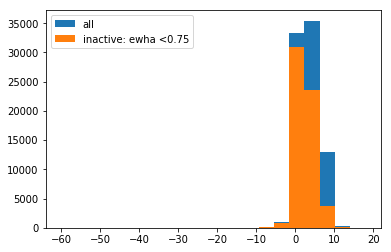

In [146]:
ewha = np.array(literaturesearch['ewha'])
spt = np.array(literaturesearch['spt'])
mask = (~np.isnan(ewha)) * (~np.isnan(spt))
mask_inactive = ewha < 0.75
bins=20
plt.hist(spt[mask],bins=bins,label='all');
plt.hist(spt[mask*mask_inactive],bins=bins,label='inactive: ewha <0.75')
plt.legend()
plt.show()

/Users/rociokiman/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


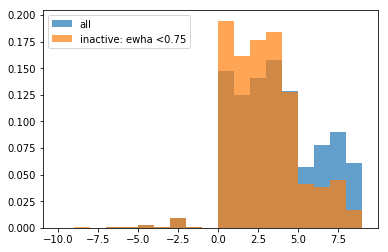

In [147]:
plt.hist(literaturesearch['spt'][mask],bins=np.arange(-10,10),label='all',
         normed=True, alpha=0.7);
plt.hist(literaturesearch['spt'][mask*mask_inactive],bins=np.arange(-10,10),label='inactive: ewha <0.75',
         normed=True, alpha=0.7)
plt.legend();

/Users/rociokiman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/Users/rociokiman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  
/Users/rociokiman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/rociokiman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


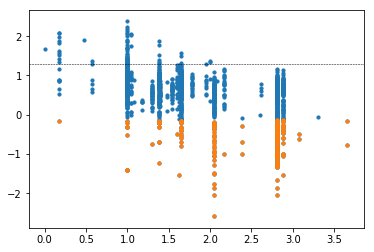

/Users/rociokiman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/Users/rociokiman/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in log10
  # Remove the CWD from sys.path while we load stuff.


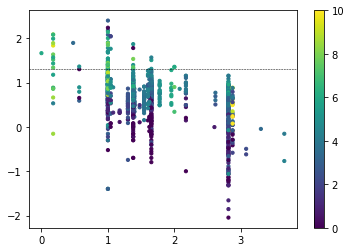

In [148]:
linewidth=0.5
plt.scatter(np.log10(literaturesearch['age']),np.log10(literaturesearch['ewha']),s=10)
plt.scatter(np.log10(literaturesearch['age'][mask_inactive]),np.log10(literaturesearch['ewha'][mask_inactive]),
            s=10)
#plt.axhline(y=np.log10(-min_halpha),color='k',linestyle='--',linewidth=linewidth)
plt.axhline(y=np.log10(20),color='k',linestyle='--',linewidth=linewidth)
#plt.ylim(-10,50)
plt.show()

plt.scatter(np.log10(literaturesearch['age']),np.log10(literaturesearch['ewha']),c=literaturesearch['spt'],s=10,vmin=0)
#plt.axhline(y=np.log10(-min_halpha),color='k',linestyle='--',linewidth=linewidth)
plt.axhline(y=np.log10(20),color='k',linestyle='--',linewidth=linewidth)
plt.colorbar()
#plt.ylim(-10,50)
plt.show()

In [149]:
literaturesearch.sort(['source_ref', 'ra', 'dec'])

In [150]:
#literaturesearch.write('Catalogs/mactivity_movinggroups.fits',format='fits',overwrite=True)
literaturesearch.write('Catalogs/literature_search.fits',format='fits',overwrite=True)